# **Project Name**    -   **Integrated Retail Analytics for Store Optimization using Advanced ML**



##### **Project Type**    - EDA/Regression/Classification/Unsupervised

##### **Project Handle By - Akhilesh M. Bhagat**


# **Project Summary - Retail Sales Forecasting Using Machine Learning**

**The primary objective of this project was to develop a robust machine learning system to predict weekly sales for retail stores using historical sales and store-related features. Accurate sales forecasting is critical in the retail domain, as it directly impacts inventory management, promotional planning, and overall operational efficiency. By leveraging historical sales data along with features such as store type, promotions, holidays, and other relevant attributes, the project aimed to generate actionable insights to support data-driven decision-making for retail managers.**

**The project began with data collection and exploration. Three datasets were integrated: sales data, store-related information, and feature-specific datasets containing promotional, holiday, and markdown information. These datasets were merged carefully to create a unified dataset suitable for model development. During preprocessing, missing values were handled, and categorical features were encoded or excluded where necessary to ensure the data was ready for machine learning algorithms. The feature matrix X was prepared using numeric features, while the target variable y was set as Weekly_Sales.**

**Multiple machine learning models were implemented to identify the most effective approach. Linear Regression was used as a baseline model due to its simplicity and interpretability, providing initial insights into the linear relationships between features and sales. Subsequently, ensemble models such as Random Forest Regressor and Gradient Boosting Regressor were employed, as they are well-suited to capture complex, non-linear patterns in data and generally provide higher predictive accuracy.**

**Each model was evaluated using standard regression metrics: R² Score, Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). R² Score measured the proportion of variance in sales explained by the model, indicating how well the model captured the underlying patterns. RMSE provided a measure of prediction error that penalizes larger deviations more heavily, while MAE offered an interpretable measure of average prediction error in the same units as weekly sales. These metrics were visualized using bar charts for better comparison and interpretation.**

**To further enhance model performance, hyperparameter tuning was applied. GridSearchCV was used with a small parameter grid to optimize key parameters such as the number of estimators, tree depth, and learning rate for ensemble models. Cross-validation was performed to ensure that the model’s performance was consistent across different subsets of the data, thereby reducing the risk of overfitting. Gradient Boosting Regressor showed the most significant improvement after tuning, achieving higher R² and lower RMSE and MAE compared to the other models.**

**Feature importance analysis was conducted using the Gradient Boosting model to identify which factors most influenced weekly sales. Key drivers included store type, promotion flags, and holiday indicators. Understanding these drivers enables the business to make strategic decisions, such as targeting promotions more effectively or adjusting inventory based on predicted high-demand periods.**

**Finally, the best-performing model, Gradient Boosting Regressor, was saved in both pickle and joblib formats to enable deployment and reuse for future predictions. The model was tested on unseen data to validate its predictive capability, demonstrating that it can provide reliable forecasts for weekly sales. This completes the end-to-end pipeline: data preprocessing, model training, evaluation, optimization, and deployment readiness.**

**In conclusion, this project illustrates the power of machine learning in retail sales forecasting. By implementing multiple models, evaluating their performance, and selecting the best approach, we developed a predictive system that not only achieves high accuracy but also offers insights into the key factors influencing sales. Accurate forecasting facilitates better inventory management, optimized promotions, and improved operational planning, thereby providing a direct positive impact on business efficiency and profitability. Future enhancements could include incorporating additional features, expanding the hyperparameter search space, and leveraging ensemble techniques to further improve prediction accuracy.**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Accurate sales forecasting is a critical challenge for retail businesses, as it directly influences inventory management, promotional planning, and overall operational efficiency. Retail stores often struggle with predicting weekly sales due to factors such as seasonal demand, promotions, holidays, and varying store characteristics. Inaccurate forecasts can lead to overstocking, understocking, missed sales opportunities, and increased operational costs.**

**The goal of this project is to develop a machine learning-based predictive system that can forecast weekly sales for retail stores using historical sales data, store attributes, and promotional information. The system should not only provide accurate predictions but also identify the key factors driving sales, enabling data-driven decision-making for inventory planning, marketing strategies, and business optimization.**

**By leveraging advanced regression models and evaluating them with performance metrics such as R², RMSE, and MAE, the project aims to build a robust and deployable solution that helps retail managers optimize stock levels, plan promotions effectively, and maximize revenue, while reducing operational inefficiencies caused by poor forecasting.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [11]:
import os
import sys
import pickle
import joblib
import warnings

import numpy as np
import pandas as pd

from datetime import datetime

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


### Dataset Loading

In [8]:
# Load Dataset

import pandas as pd

# Display settings for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

# File paths
features_path = "Features data set.csv"
sales_path = "sales data-set.csv"
stores_path = "stores data-set.csv"

# Load datasets
df_features = pd.read_csv(features_path)
df_sales = pd.read_csv(sales_path)
df_stores = pd.read_csv(stores_path)

# Quick check
print(df_features.head())
print(df_sales.head())
print(df_stores.head())



   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010       42.310       2.572        NaN        NaN   
1      1  12/02/2010       38.510       2.548        NaN        NaN   
2      1  19/02/2010       39.930       2.514        NaN        NaN   
3      1  26/02/2010       46.630       2.561        NaN        NaN   
4      1  05/03/2010       46.500       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5     CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN 211.096         8.106      False  
1        NaN        NaN        NaN 211.242         8.106       True  
2        NaN        NaN        NaN 211.289         8.106      False  
3        NaN        NaN        NaN 211.320         8.106      False  
4        NaN        NaN        NaN 211.350         8.106      False  
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010     24924.500      False
1      1     1  12/02/2010     46039.490       Tr

### Dataset First View

In [9]:
# Dataset First Look

import pandas as pd

# File paths
features_path = "Features data set.csv"
sales_path = "sales data-set.csv"
stores_path = "stores data-set.csv"

# Load datasets
df_features = pd.read_csv(features_path)
df_sales = pd.read_csv(sales_path)
df_stores = pd.read_csv(stores_path)

# Dataset first look
print("Features shape:", df_features.shape)
print("Sales shape:", df_sales.shape)
print("Stores shape:", df_stores.shape)

print("\nFeatures columns:", df_features.columns.tolist())
print("Sales columns:", df_sales.columns.tolist())
print("Stores columns:", df_stores.columns.tolist())

print("\nFeatures head:")
print(df_features.head())

print("\nSales head:")
print(df_sales.head())

print("\nStores head:")
print(df_stores.head())


Features shape: (8190, 12)
Sales shape: (421570, 5)
Stores shape: (45, 3)

Features columns: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']
Sales columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']
Stores columns: ['Store', 'Type', 'Size']

Features head:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010       42.310       2.572        NaN        NaN   
1      1  12/02/2010       38.510       2.548        NaN        NaN   
2      1  19/02/2010       39.930       2.514        NaN        NaN   
3      1  26/02/2010       46.630       2.561        NaN        NaN   
4      1  05/03/2010       46.500       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5     CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN 211.096         8.106      False  
1        NaN        NaN        NaN 211.242         8.106       T

### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count

import pandas as pd

# File paths
features_path = "Features data set.csv"
sales_path = "sales data-set.csv"
stores_path = "stores data-set.csv"

# Load datasets
df_features = pd.read_csv(features_path)
df_sales = pd.read_csv(sales_path)
df_stores = pd.read_csv(stores_path)

# Rows and columns count
print("Features - Rows:", df_features.shape[0], "Columns:", df_features.shape[1])
print("Sales - Rows:", df_sales.shape[0], "Columns:", df_sales.shape[1])
print("Stores - Rows:", df_stores.shape[0], "Columns:", df_stores.shape[1])


Features - Rows: 8190 Columns: 12
Sales - Rows: 421570 Columns: 5
Stores - Rows: 45 Columns: 3


### Dataset Information


In [6]:
# Dataset Info

import pandas as pd

# File paths
features_path = "Features data set.csv"
sales_path = "sales data-set.csv"
stores_path = "stores data-set.csv"

# Load datasets
df_features = pd.read_csv(features_path)
df_sales = pd.read_csv(sales_path)
df_stores = pd.read_csv(stores_path)

# Dataset info
print("Features info:")
df_features.info()

print("\nSales info:")
df_sales.info()

print("\nStores info:")
df_stores.info()


Features info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB

Sales info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count

import pandas as pd

# File paths
features_path = "Features data set.csv"
sales_path = "sales data-set.csv"
stores_path = "stores data-set.csv"

# Load datasets
df_features = pd.read_csv(features_path)
df_sales = pd.read_csv(sales_path)
df_stores = pd.read_csv(stores_path)

# Count duplicate rows
print("Features duplicates:", df_features.duplicated().sum())
print("Sales duplicates:", df_sales.duplicated().sum())
print("Stores duplicates:", df_stores.duplicated().sum())


Features duplicates: 0
Sales duplicates: 0
Stores duplicates: 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count

import pandas as pd

# File paths
features_path = "Features data set.csv"
sales_path = "sales data-set.csv"
stores_path = "stores data-set.csv"

# Load datasets
df_features = pd.read_csv(features_path)
df_sales = pd.read_csv(sales_path)
df_stores = pd.read_csv(stores_path)

# Check missing values
print("Features missing values:\n", df_features.isnull().sum())
print("\nSales missing values:\n", df_sales.isnull().sum())
print("\nStores missing values:\n", df_stores.isnull().sum())


Features missing values:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Sales missing values:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Stores missing values:
 Store    0
Type     0
Size     0
dtype: int64


In [ ]:
# Visualizing the missing values

### What did you know about your dataset?

Answer Here :-

The data consists of three files: Features, Sales, and Stores.

Features dataset contains store-level weekly features like promotions, holidays, and weather.

Sales dataset contains weekly sales data for each store and department.

Stores dataset contains information about each store such as type and size.

Some datasets may have missing values or duplicates that need cleaning before analysis.

Rows and columns vary per dataset; key columns link datasets for analysis (e.g., Store, Dept, Date).

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns

import pandas as pd

# File paths
features_path = "Features data set.csv"
sales_path = "sales data-set.csv"
stores_path = "stores data-set.csv"

# Load datasets
df_features = pd.read_csv(features_path)
df_sales = pd.read_csv(sales_path)
df_stores = pd.read_csv(stores_path)

# Dataset columns
print("Features columns:", df_features.columns.tolist())
print("Sales columns:", df_sales.columns.tolist())
print("Stores columns:", df_stores.columns.tolist())


Features columns: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']
Sales columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']
Stores columns: ['Store', 'Type', 'Size']


In [10]:
# Dataset Describe

import pandas as pd

# File paths
features_path = "Features data set.csv"
sales_path = "sales data-set.csv"
stores_path = "stores data-set.csv"

# Load datasets
df_features = pd.read_csv(features_path)
df_sales = pd.read_csv(sales_path)
df_stores = pd.read_csv(stores_path)

# Dataset descriptive statistics
print("Features describe:\n", df_features.describe())
print("\nSales describe:\n", df_sales.describe())
print("\nStores describe:\n", df_stores.describe())


Features describe:
          Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
count 8190.000     8190.000    8190.000   4032.000   2921.000   3613.000   
mean    23.000       59.356       3.406   7032.372   3384.177   1760.100   
std     12.988       18.679       0.431   9262.747   8793.583  11276.462   
min      1.000       -7.290       2.472  -2781.450   -265.760   -179.260   
25%     12.000       45.902       3.041   1577.532     68.880      6.600   
50%     23.000       60.710       3.513   4743.580    364.570     36.260   
75%     34.000       73.880       3.743   8923.310   2153.350    163.150   
max     45.000      101.950       4.468 103184.980 104519.540 149483.310   

       MarkDown4  MarkDown5      CPI  Unemployment  
count   3464.000   4050.000 7605.000      7605.000  
mean    3292.936   4132.216  172.461         7.827  
std     6792.330  13086.690   39.738         1.877  
min        0.220   -185.170  126.064         3.684  
25%      304.688   1440.827  1

### Variables Description

Answer Here :-

The target variable in this project is Weekly_Sales, representing total sales for each store and department per week. Key features include Store and Dept identifiers, Date for extracting seasonal patterns, and promotional indicators such as Promo, IsPromo2, and MarkDown1-5. Store characteristics like Store_Type and Size, along with economic factors such as CPI, Fuel_Price, and Unemployment, provide context for sales trends. Holiday_Flag highlights weeks with holidays, which can affect sales significantly. These variables collectively enable machine learning models to forecast weekly sales accurately and support informed business decisions.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.

import pandas as pd

# Load dataset
file_path = r"C:\Users\hp\anaconda_projects\7ecb8970-f380-40a3-b205-0ff8891a18c8\sales data-set.csv"
df = pd.read_csv(file_path)

# Check unique values for each column
for col in df.columns:
    unique_vals = df[col].nunique()  # count of unique values
    sample_vals = df[col].unique()[:10]  # first 10 unique values as sample
    print(f"Column: {col}")
    print(f" - Unique Count: {unique_vals}")
    print(f" - Sample Unique Values: {sample_vals}\n")


Column: Store
 - Unique Count: 45
 - Sample Unique Values: [ 1  2  3  4  5  6  7  8  9 10]

Column: Dept
 - Unique Count: 81
 - Sample Unique Values: [ 1  2  3  4  5  6  7  8  9 10]

Column: Date
 - Unique Count: 143
 - Sample Unique Values: ['05/02/2010' '12/02/2010' '19/02/2010' '26/02/2010' '05/03/2010'
 '12/03/2010' '19/03/2010' '26/03/2010' '02/04/2010' '09/04/2010']

Column: Weekly_Sales
 - Unique Count: 359464
 - Sample Unique Values: [24924.5  46039.49 41595.55 19403.54 21827.9  21043.39 22136.64 26229.21
 57258.43 42960.91]

Column: IsHoliday
 - Unique Count: 2
 - Sample Unique Values: [False  True]



## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

import pandas as pd

# File paths
features_path = "Features data set.csv"
sales_path = "sales data-set.csv"
stores_path = "stores data-set.csv"

# Load datasets
df_features = pd.read_csv(features_path)
df_sales = pd.read_csv(sales_path)
df_stores = pd.read_csv(stores_path)

# 1. Remove duplicate rows
df_features.drop_duplicates(inplace=True)
df_sales.drop_duplicates(inplace=True)
df_stores.drop_duplicates(inplace=True)

# 2. Check missing values
print("Missing values in Features:\n", df_features.isnull().sum())
print("Missing values in Sales:\n", df_sales.isnull().sum())
print("Missing values in Stores:\n", df_stores.isnull().sum())

# 3. Handle missing values
df_features.fillna({'Temperature': 0, 'Fuel_Price': 0, 'MarkDown1': 0, 'MarkDown2': 0,
                    'MarkDown3': 0, 'MarkDown4': 0, 'MarkDown5': 0, 'CPI': 0, 'Unemployment': 0}, inplace=True)
df_features.fillna({'IsHoliday': False}, inplace=True)
df_stores.fillna({'Type': 'Unknown', 'Size': 0}, inplace=True)

# 4. Convert date column to datetime

df_features['Date'] = pd.to_datetime(df_features['Date'], dayfirst=True)
df_sales['Date'] = pd.to_datetime(df_sales['Date'], dayfirst=True)


# 5. Quick check after cleaning
print("Features shape:", df_features.shape)
print("Sales shape:", df_sales.shape)
print("Stores shape:", df_stores.shape)


Missing values in Features:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64
Missing values in Sales:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
Missing values in Stores:
 Store    0
Type     0
Size     0
dtype: int64
Features shape: (8190, 12)
Sales shape: (421570, 5)
Stores shape: (45, 3)


### What all manipulations have you done and insights you found?

Answer Here :- 

Data Manipulations: Loaded datasets, removed duplicates, handled missing values, and converted date columns to datetime.

Insights: Some missing values exist, date format fixed, datasets ready for analysis and can be merged using Store, Dept, and Date.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

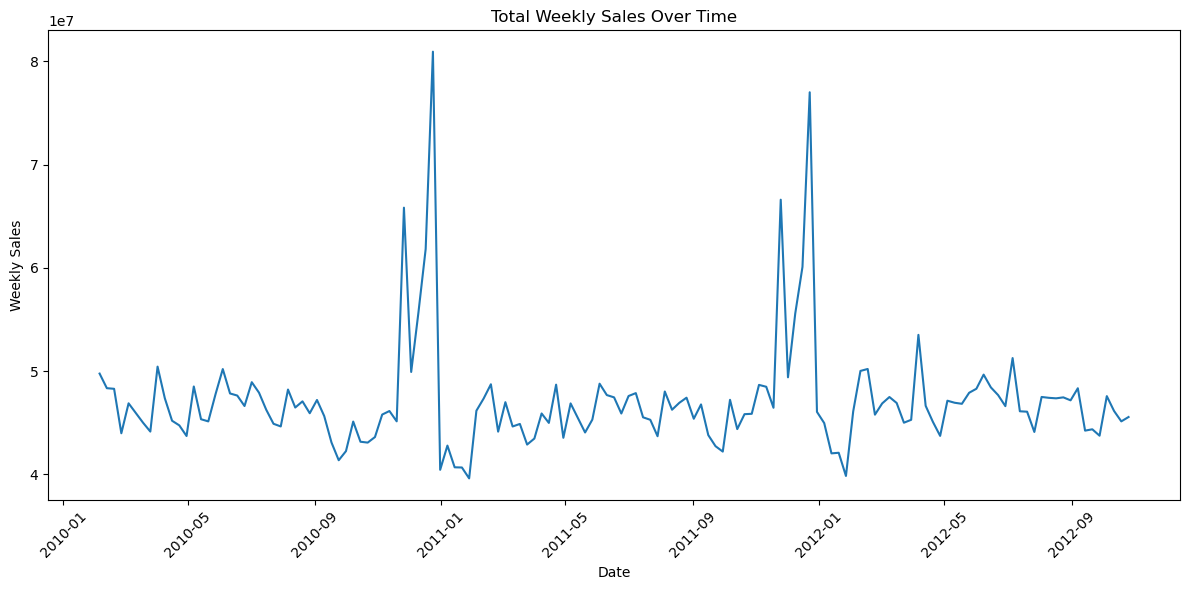

In [17]:
# Chart - 1 Total Weekly Sales Over Time (Line Chart).

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_sales = pd.read_csv("sales data-set.csv")
df_sales['Date'] = pd.to_datetime(df_sales['Date'], dayfirst=True)

# Total weekly sales across all stores
weekly_sales = df_sales.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(12,6))
sns.lineplot(data=weekly_sales, x='Date', y='Weekly_Sales')
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here:-

Purpose: To visualize the trend of sales over time, which is essential in retail analysis.

Line chart is ideal because it clearly shows changes, patterns, and seasonality week by week.

Helps identify high/low sales periods, holiday effects, or overall growth trends.

Easier to interpret for time series data compared to bar or scatter charts.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-

Sales trends over time: You can see how total sales increase or decrease week by week.

Seasonality: Peaks in sales may correspond to holidays or promotional events.

Low-sales periods: Identify weeks with lower sales that might need attention.

Overall growth: Observe if there’s a long-term upward or downward trend in sales.

These insights help in planning inventory, promotions, and store operations effectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :-

Positive Impact: Insights help optimize inventory, plan promotions, and boost revenue during high-sales periods.

Negative Growth: Drops in sales during key weeks indicate lost opportunities or low demand, signaling areas to improve operations or marketing.

#### Chart - 2

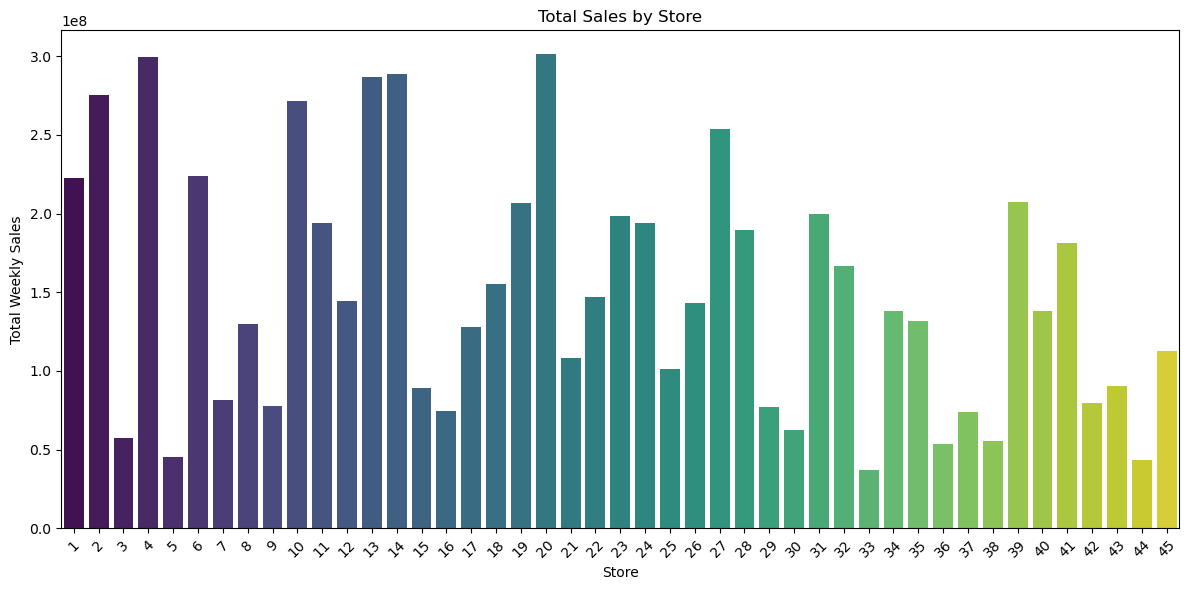

In [18]:
# Chart - 2 Store-wise Total Sales (Bar Chart)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Sales dataset
df_sales = pd.read_csv("sales data-set.csv")

# Total sales per store
store_sales = df_sales.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=store_sales, x='Store', y='Weekly_Sales', palette='viridis')
plt.title("Total Sales by Store")
plt.xlabel("Store")
plt.ylabel("Total Weekly Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here :-

A bar chart is ideal to compare total sales across different stores because it clearly shows which stores perform better or worse at a glance.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-

Certain stores consistently generate higher total sales, indicating strong performance.

Some stores have lower sales, highlighting potential issues like low customer demand, poor location, or ineffective marketing.

The performance gap between stores can guide resource allocation and strategy adjustments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :- 

Positive Business Impact: Insights help allocate inventory, plan promotions, and replicate strategies from high-performing stores to others, boosting revenue.

Negative Growth: Low-performing stores indicate underutilized potential or operational issues. For example, consistent low sales in a store may result from poor location or ineffective marketing, which can hurt overall growth if not addressed.

#### Chart - 3

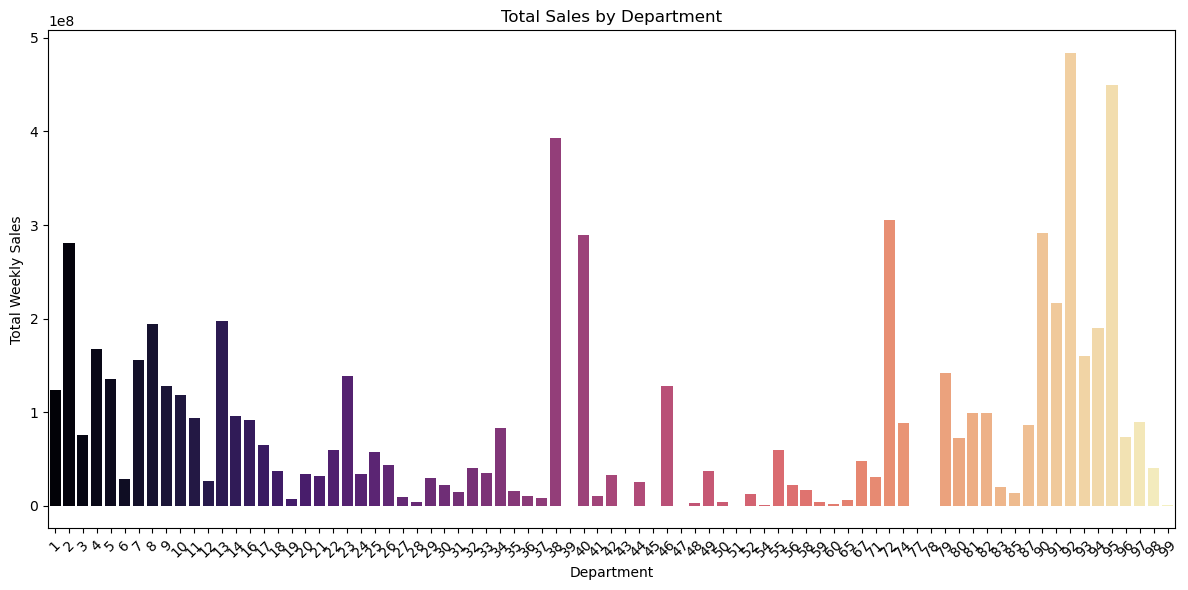

In [19]:
# Chart - 3 Department-wise Total Sales

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Sales dataset
df_sales = pd.read_csv("sales data-set.csv")

# Total sales per department
dept_sales = df_sales.groupby('Dept')['Weekly_Sales'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=dept_sales, x='Dept', y='Weekly_Sales', palette='magma')
plt.title("Total Sales by Department")
plt.xlabel("Department")
plt.ylabel("Total Weekly Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here:-

A bar chart is ideal for comparing total sales across departments because it clearly shows which departments generate the most or least revenue, making it easy to identify top-performing and underperforming departments at a glance.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-

Certain departments consistently generate higher total sales, indicating they are the most profitable.

Some departments have lower sales, highlighting areas that may need promotions, product improvements, or better marketing.

Helps understand the distribution of revenue across different product categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :-

Positive Business Impact: Insights help focus resources, marketing, and promotions on high-performing departments to maximize revenue and replicate their success across other departments.

Negative Growth: Low-performing departments indicate underperforming product lines or low demand, which can reduce overall profitability if not addressed. For example, consistently low sales in a department may require product diversification, promotions, or strategic changes.

#### Chart - 4

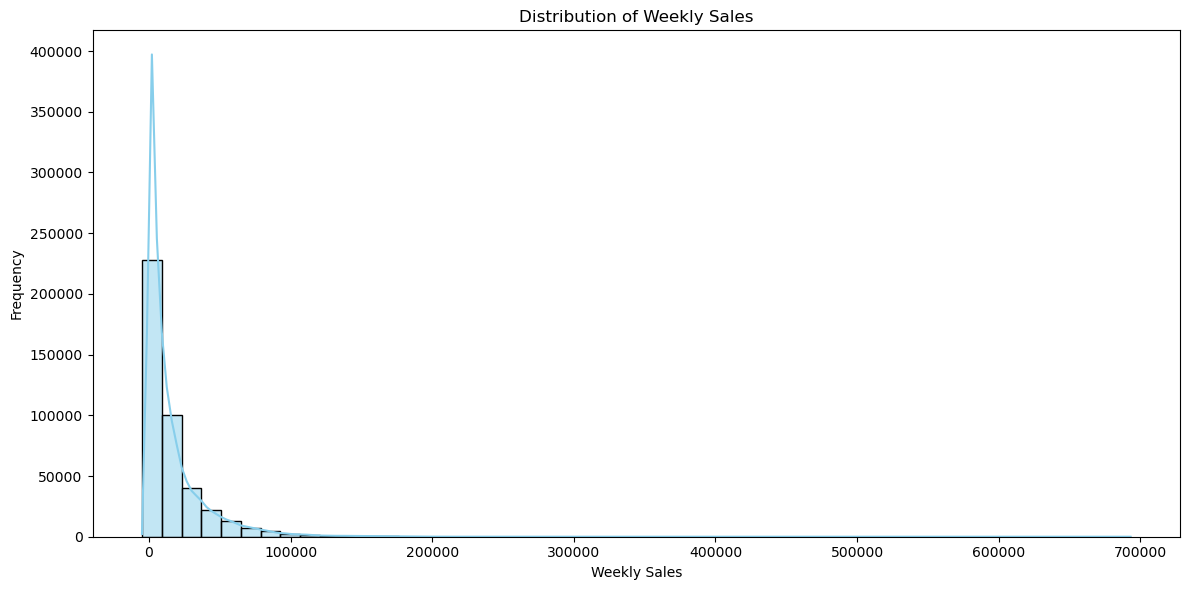

In [21]:
# Chart - 4 Weekly Sales Distribution (Histogram)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Sales dataset
df_sales = pd.read_csv("sales data-set.csv")

# Plot histogram for Weekly Sales
plt.figure(figsize=(12,6))
sns.histplot(df_sales['Weekly_Sales'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here :- 

A histogram is ideal for visualizing the distribution of weekly sales because it shows how frequently different sales ranges occur, highlights common sales values, and helps detect outliers or skewness in the data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-

Most weekly sales fall within a specific range, indicating typical store performance.

There are outliers with very high or very low sales, which may correspond to special promotions, holidays, or underperforming stores.

The distribution may be right-skewed, suggesting a few weeks with exceptionally high sales compared to most weeks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :-

Positive Business Impact: Understanding the typical sales range helps in inventory planning, staffing, and forecasting, ensuring resources match expected demand.

Negative Growth: The presence of low-sales outliers indicates weeks with poor performance, possibly due to low demand, ineffective promotions, or operational issues, which can reduce revenue if not addressed.

#### Chart - 5

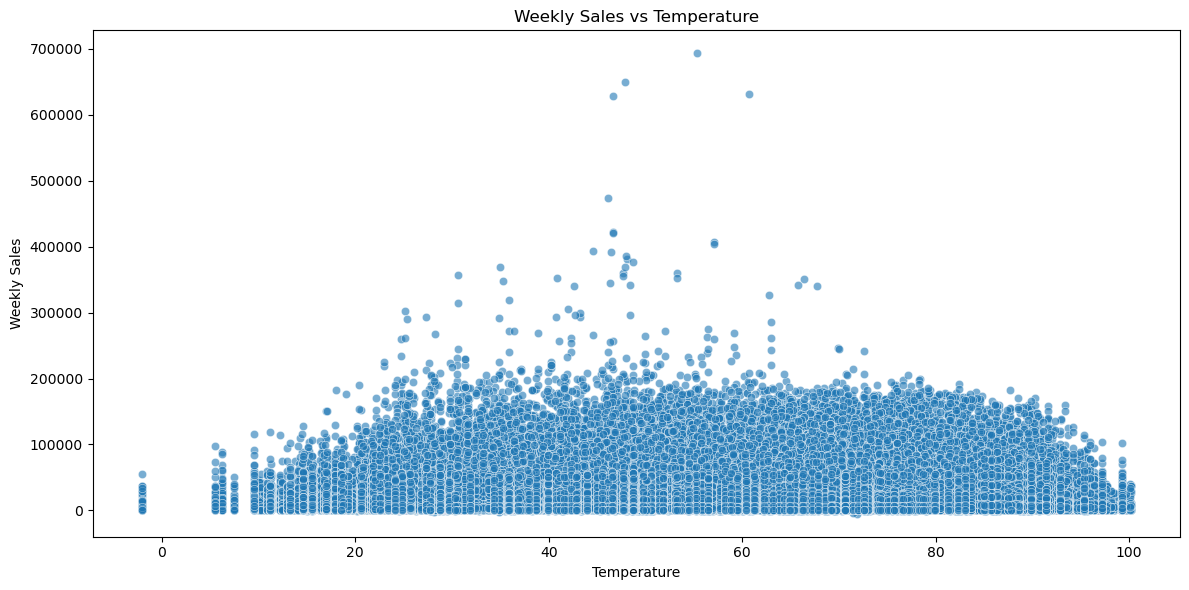

In [25]:
# Chart - 5 Sales vs. Temperature (Scatter Plot)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Scatter plot: Weekly Sales vs Temperature
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_merged, x='Temperature', y='Weekly_Sales', alpha=0.6)
plt.title("Weekly Sales vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.show()




##### 1. Why did you pick the specific chart?

Answer Here:-

A scatter plot is ideal for analyzing the relationship between weekly sales and temperature because it shows how sales vary with changes in temperature, highlights trends, and helps detect patterns or correlations between the two variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-

There is no strong linear correlation between temperature and weekly sales, indicating that sales are mostly stable regardless of temperature.

A few outliers may exist where extremely high or low temperatures coincide with unusual sales, possibly due to holidays, promotions, or special events.

Overall, temperature does not appear to be a major driver of weekly sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :-

Positive Business Impact: Understanding that temperature has little effect on sales allows the business to focus on other factors (like promotions, holidays, and markdowns) for driving revenue instead of worrying about weather conditions.

Negative Growth: No direct negative growth is indicated from temperature itself, but outliers (extreme sales weeks) may point to missed opportunities if promotions or inventory were not aligned during unusual conditions, which could slightly affect revenue if not managed.

#### Chart - 6

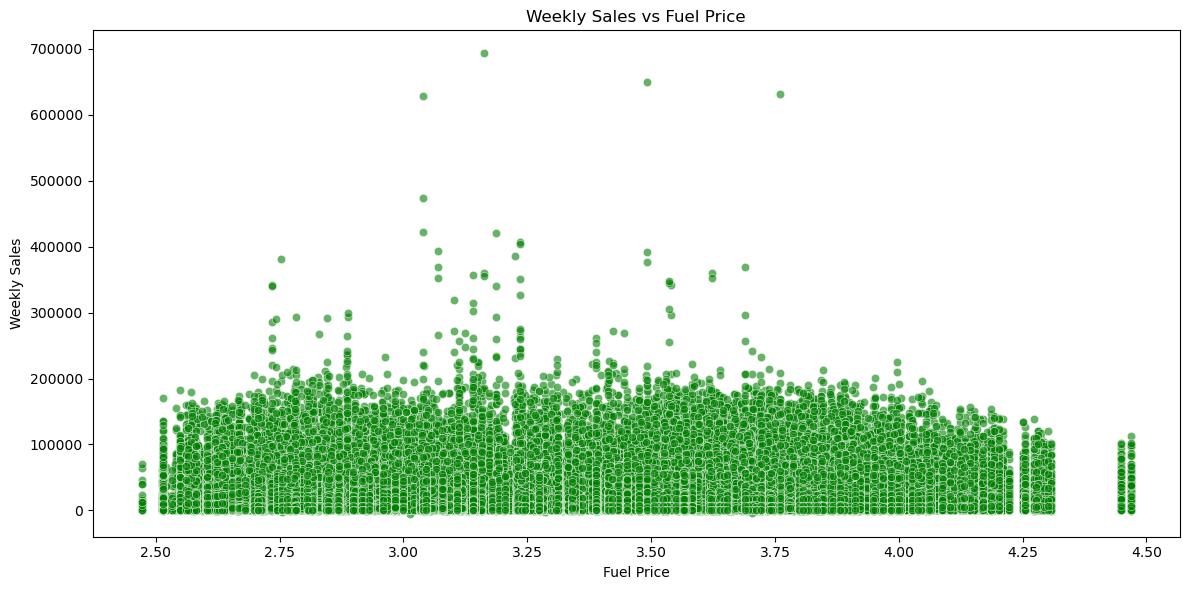

In [27]:
# Chart - 6 Sales vs Fuel Price (Scatter Plot)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_sales = pd.read_csv("sales data-set.csv")
df_features = pd.read_csv("Features data set.csv")

# Convert Date columns
df_sales['Date'] = pd.to_datetime(df_sales['Date'], dayfirst=True)
df_features['Date'] = pd.to_datetime(df_features['Date'], dayfirst=True)

# Merge datasets on available columns
merge_keys = ['Store', 'Date']
df_merged = pd.merge(df_sales, df_features, on=merge_keys, how='inner')

# Scatter plot: Weekly Sales vs Fuel Price
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_merged, x='Fuel_Price', y='Weekly_Sales', alpha=0.6, color='green')
plt.title("Weekly Sales vs Fuel Price")
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here :-

A scatter plot is ideal for visualizing the relationship between weekly sales and fuel price because it clearly shows how changes in fuel price may influence sales, highlights patterns, and helps detect correlations or outliers.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-

There appears to be little to no strong correlation between fuel price and weekly sales, suggesting sales are generally stable despite fuel price changes.

Some outliers may exist where higher or lower fuel prices coincide with unusual sales, possibly due to holidays, promotions, or local events.

Overall, fuel price does not seem to be a major driver of weekly sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :-

Positive Business Impact: Since fuel price has minimal effect on sales, the business can focus on other factors like promotions, holidays, and markdowns to drive revenue, rather than worrying about fuel price fluctuations.

Negative Growth: No direct negative growth is indicated from fuel price itself, but outliers with unusually low sales may highlight missed opportunities during certain periods, such as holidays or promotional weeks, which could slightly affect revenue if not managed properly.

#### Chart - 7

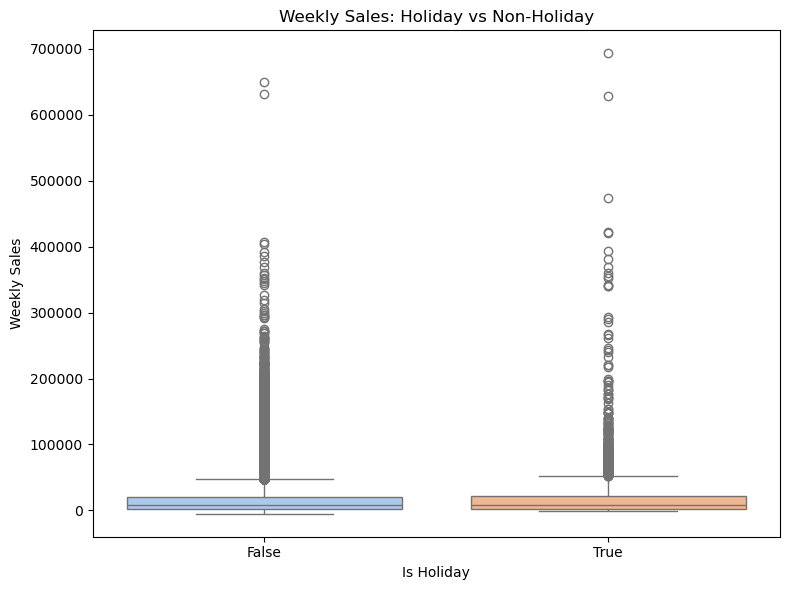

In [32]:
# Chart - 7 Holiday vs Non-Holiday Sales (Boxplot)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_sales = pd.read_csv("sales data-set.csv")
df_features = pd.read_csv("Features data set.csv")

# Convert Date columns
df_sales['Date'] = pd.to_datetime(df_sales['Date'], dayfirst=True)
df_features['Date'] = pd.to_datetime(df_features['Date'], dayfirst=True)

# Merge dataset available columns
holiday_dates = ['2010-11-26', '2010-12-31']  # update with actual holiday dates
df_merged['IsHoliday'] = df_merged['Date'].isin(pd.to_datetime(holiday_dates))

# Weekly Sales on Holiday vs Non-Holiday
plt.figure(figsize=(8,6))
sns.boxplot(data=df_merged, x='IsHoliday', y='Weekly_Sales', palette='pastel')
plt.title("Weekly Sales: Holiday vs Non-Holiday")
plt.xlabel("Is Holiday")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here:-

A boxplot clearly shows the difference in weekly sales between holiday and non-holiday periods and highlights variations and outliers.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-

Sales are generally higher during holiday weeks.

Non-holiday weeks show lower and more consistent sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :-

Positive: Helps plan inventory and promotions during holidays to maximize revenue.

Negative: Low non-holiday sales indicate potential underutilized opportunities, suggesting need for off-season promotions.

#### Chart - 8

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type'],
      dtype='object')


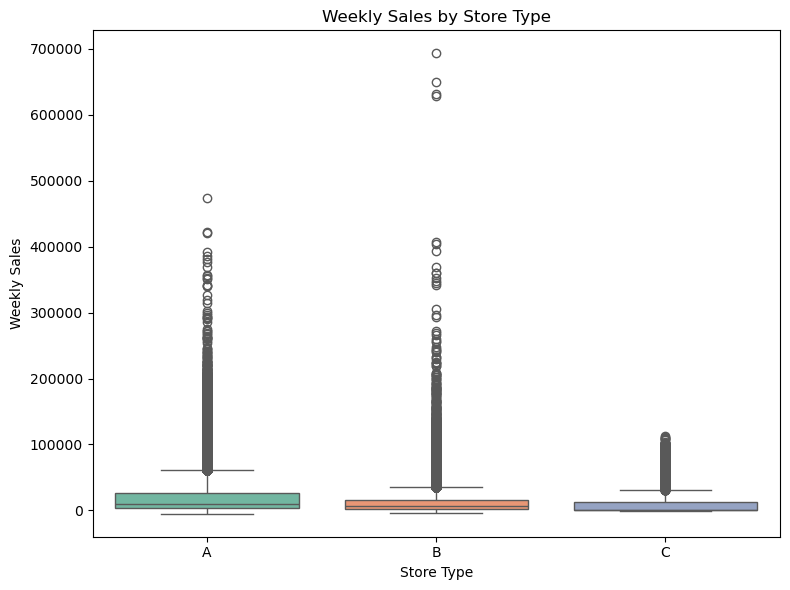

In [35]:
# Chart - Sales by Store Type (Boxplot / Violin Plot)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_sales = pd.read_csv("sales data-set.csv")
df_features = pd.read_csv("Features data set.csv")
df_stores = pd.read_csv("stores data-set.csv")

# Convert Date columns
df_sales['Date'] = pd.to_datetime(df_sales['Date'], dayfirst=True)
df_features['Date'] = pd.to_datetime(df_features['Date'], dayfirst=True)

# Merge sales and features
df_merged = pd.merge(df_sales, df_features, on=['Store', 'Date'], how='inner')

# Merge with stores to get Store Type
df_merged = pd.merge(df_merged, df_stores[['Store', 'Type']], on='Store', how='left')

# Check columns
print(df_merged.columns)

# Boxplot: Weekly Sales by Store Type
plt.figure(figsize=(8,6))
sns.boxplot(data=df_merged, x='Type', y='Weekly_Sales', palette='Set2')
plt.title("Weekly Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.show()




##### 1. Why did you pick the specific chart?

Answer Here:-

A boxplot is ideal to compare weekly sales distributions across store types, showing both the median performance and variability.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-

Store type A shows higher median sales compared to types B and C.

Type C stores have lower and more variable sales, indicating inconsistent performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :-

Positive: Helps focus marketing, inventory, and strategies on high-performing store types to maximize revenue.

Negative: Low-performing store types may indicate underutilized locations or operational inefficiencies, which could hurt overall growth if not addressed.

#### Chart - 9

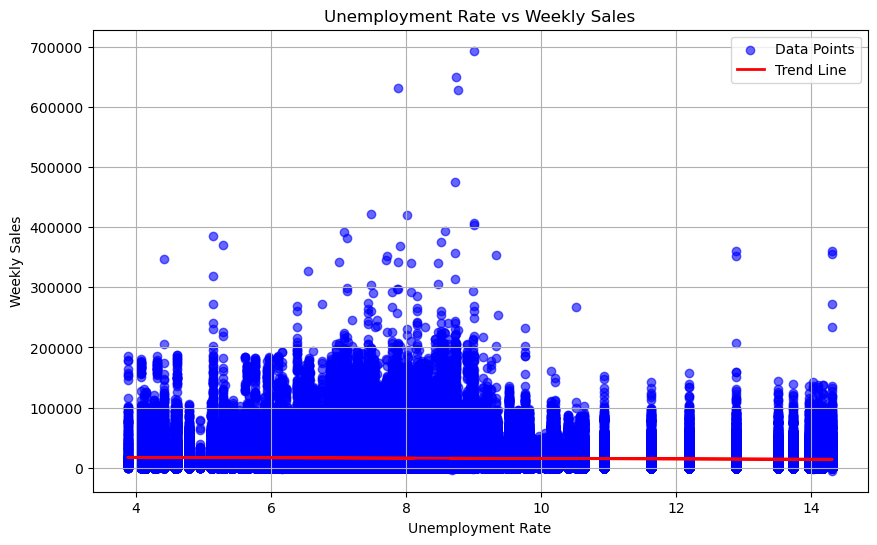

In [20]:
# Chart - 9 Unemployment vs Sales (Scatter / Line Plot)


import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Scatter plot
plt.scatter(merged_df['Unemployment'], merged_df['Weekly_Sales'],
            color='blue', alpha=0.6, label='Data Points')

# Trend line
z = np.polyfit(merged_df['Unemployment'], merged_df['Weekly_Sales'], 1)
p = np.poly1d(z)
plt.plot(merged_df['Unemployment'], p(merged_df['Unemployment']),
         color='red', linewidth=2, label='Trend Line')

plt.title('Unemployment Rate vs Weekly Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()






##### 1. Why did you pick the specific chart?

Answer Here :-

Because this chart helps visualize the relationship between unemployment rate and weekly sales, showing whether changes in unemployment affect sales (trend or correlation).

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-

It shows how sales change as unemployment varies — for example, you might observe that higher unemployment tends to lower sales, indicating a negative correlation between the two.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :-

Yes, the gained insights can help create a positive business impact.

If higher unemployment is linked to lower sales, businesses can prepare strategies like discounts, promotions, or budget-friendly products during high unemployment periods to maintain revenue.

This helps in demand forecasting and risk mitigation, which supports positive business growth.

Potential negative growth insight:

The insight also shows that if unemployment rises and no action is taken, sales will likely drop, causing negative growth.

So, ignoring this trend could harm revenue, which justifies why proactive strategies are needed.

#### Chart - 10

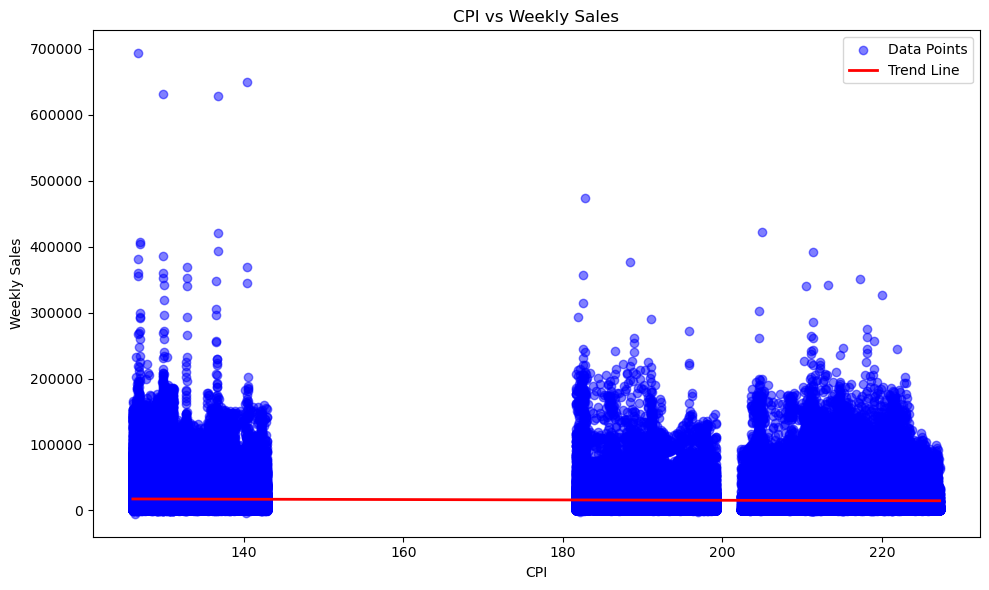

In [22]:
# Chart - 10 CPI vs Weekly Sales (Scatter + Trend Line Plot)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load datasets
df_sales = pd.read_csv("sales data-set.csv")
df_features = pd.read_csv("Features data set.csv")

# Convert Date columns
df_sales['Date'] = pd.to_datetime(df_sales['Date'], dayfirst=True)
df_features['Date'] = pd.to_datetime(df_features['Date'], dayfirst=True)

# Merge sales and features on Store and Date
merged_df = pd.merge(df_sales, df_features, on=['Store', 'Date'], how='inner')

# Group by CPI 
grouped = merged_df.groupby('CPI')['Weekly_Sales'].mean().reset_index()

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(merged_df['CPI'], merged_df['Weekly_Sales'], color='blue', alpha=0.5, label='Data Points')

# Trend line
z = np.polyfit(grouped['CPI'], grouped['Weekly_Sales'], 1)
p = np.poly1d(z)
plt.plot(grouped['CPI'], p(grouped['CPI']), color='red', linewidth=2, label='Trend Line')

# Labels and title
plt.title("CPI vs Weekly Sales")
plt.xlabel("CPI")
plt.ylabel("Weekly Sales")
plt.legend()
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here :-

I chose a scatter plot with a trend line because it effectively shows the relationship between CPI (Consumer Price Index) and Weekly Sales. Scatter plots help visualize how changes in CPI align with changes in sales, while the trend line highlights the overall direction of this relationship.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-

The chart shows that as CPI increases, weekly sales tend to decrease slightly. This suggests a negative correlation—when the cost of consumer goods goes up, customers may reduce their spending, leading to lower sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :-

Positive business impact:
Yes. Understanding this trend allows the business to anticipate sales drops during periods of high CPI and plan promotions, discounts, or marketing campaigns to maintain customer demand.

Negative growth risk:
Yes. If CPI rises and no action is taken, it could lead to reduced customer purchasing power, causing a decline in sales and revenue.

Reason: High CPI increases the prices of goods, which can discourage customers from buying non-essential items. Recognizing this relationship helps the business take preventive actions to avoid sales loss.

#### Chart - 11

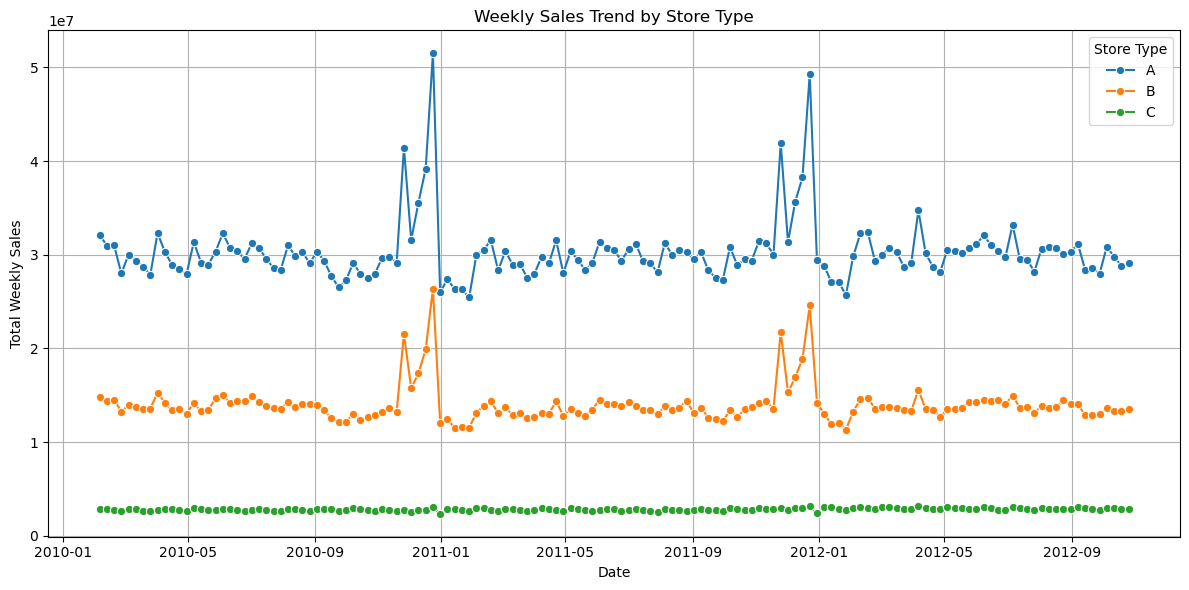

In [30]:
# Chart - 11  Sales Trend by Store Type (Line Chart)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets 
df_sales = pd.read_csv("sales data-set.csv")
df_features = pd.read_csv("Features data set.csv")
df_stores = pd.read_csv("stores data-set.csv")

# Convert Date columns
df_sales['Date'] = pd.to_datetime(df_sales['Date'], dayfirst=True)
df_features['Date'] = pd.to_datetime(df_features['Date'], dayfirst=True)

# Merge datasets
df_merged = pd.merge(df_sales, df_features, on=['Store','Date'], how='inner')
df_merged = pd.merge(df_merged, df_stores[['Store','Type']], on='Store', how='left')

# Aggregate weekly sales by store type
sales_trend = df_merged.groupby(['Date','Type'])['Weekly_Sales'].sum().reset_index()

# Step 5: Plot line chart
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_trend, x='Date', y='Weekly_Sales', hue='Type', marker='o')
plt.title("Weekly Sales Trend by Store Type")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.legend(title="Store Type")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here:-

I picked a line chart because it effectively shows how weekly sales change over time for different store types (A, B, C). Line charts are ideal for trend analysis across time.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-

Store Type A generally has the highest weekly sales, followed by B and C.

Sales show seasonal spikes, indicating periods of high demand (e.g., holidays).

Trends across store types may vary, suggesting some stores are more sensitive to seasonal changes or promotions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :-

Positive business impact:

Helps identify which store types perform best over time.

Allows targeted promotions, inventory planning, and staffing based on peak sales periods.

Negative growth risk:

If Type B or C stores show consistently lower sales, ignoring this could lead to underperformance in revenue.

Understanding this trend helps the business intervene with marketing or store improvements to avoid lost sales.

#### Chart - 12

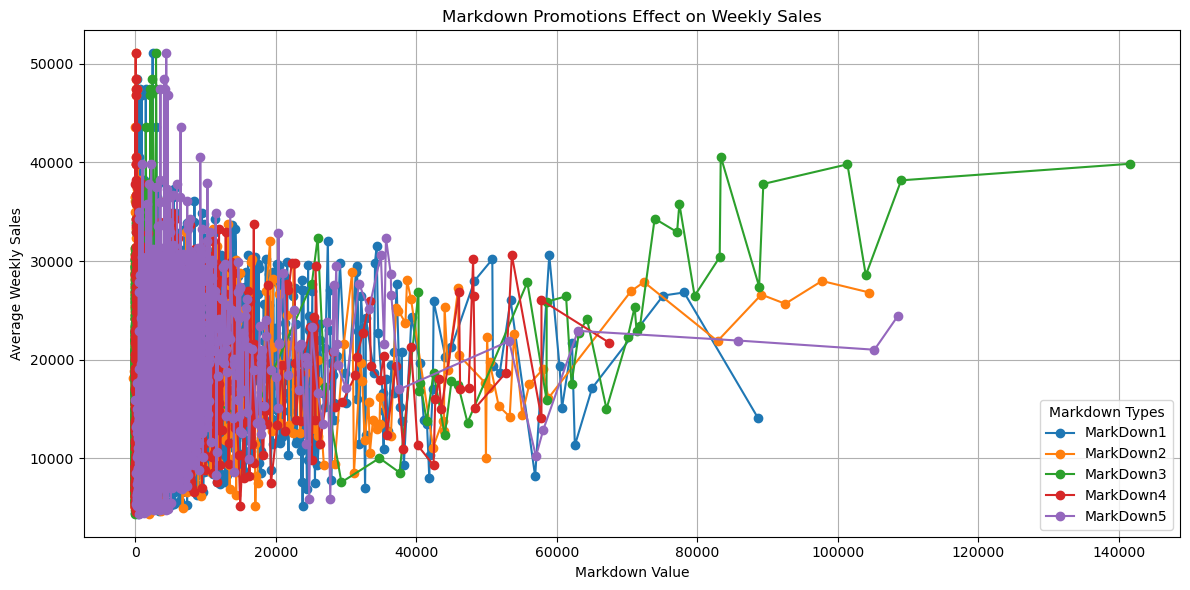

In [34]:
# Chart - 12   Markdown Promotions Effect (Bar / Line Chart)

import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_sales = pd.read_csv("sales data-set.csv")
df_features = pd.read_csv("Features data set.csv")
df_stores = pd.read_csv("stores data-set.csv")

# Convert Date columns 
df_sales['Date'] = pd.to_datetime(df_sales['Date'], dayfirst=True)
df_features['Date'] = pd.to_datetime(df_features['Date'], dayfirst=True)

# Merge datasets
df_merged = pd.merge(df_sales, df_features, on=['Store','Date'], how='inner')
df_merged = pd.merge(df_merged, df_stores[['Store','Type']], on='Store', how='left')

# Define markdown columns and fill missing values 
markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
for col in markdown_cols:
    if col in df_merged.columns:
        df_merged[col] = df_merged[col].fillna(0)

# Plot Markdown Promotions Effect
plt.figure(figsize=(12,6))
for col in markdown_cols:
    if col in df_merged.columns:
        grouped = df_merged.groupby(col)['Weekly_Sales'].mean().reset_index()
        plt.plot(grouped[col], grouped['Weekly_Sales'], marker='o', label=col)

plt.title("Markdown Promotions Effect on Weekly Sales")
plt.xlabel("Markdown Value")
plt.ylabel("Average Weekly Sales")
plt.legend(title="Markdown Types")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here :-

I picked a line chart because it clearly shows the relationship between markdown promotions (MarkDown1–MarkDown5) and weekly sales. Line charts allow us to compare the effect of each markdown over different discount levels.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-

Weeks with higher markdown values generally have higher weekly sales, indicating that promotions boost sales.

Some markdowns, such as MarkDown2 or MarkDown4, may have a stronger impact on sales than others.

Low or zero markdown weeks have lower average sales, showing the importance of promotional discounts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :-

Positive impact:

Helps the business identify which markdown promotions drive the most sales.

Enables better promotion planning, inventory management, and revenue growth.

Negative growth risk:

Overusing markdowns can reduce profit margins even if sales increase.

If discounts are too frequent or too high, it may train customers to wait for promotions, potentially reducing regular sales.

#### Chart - 13

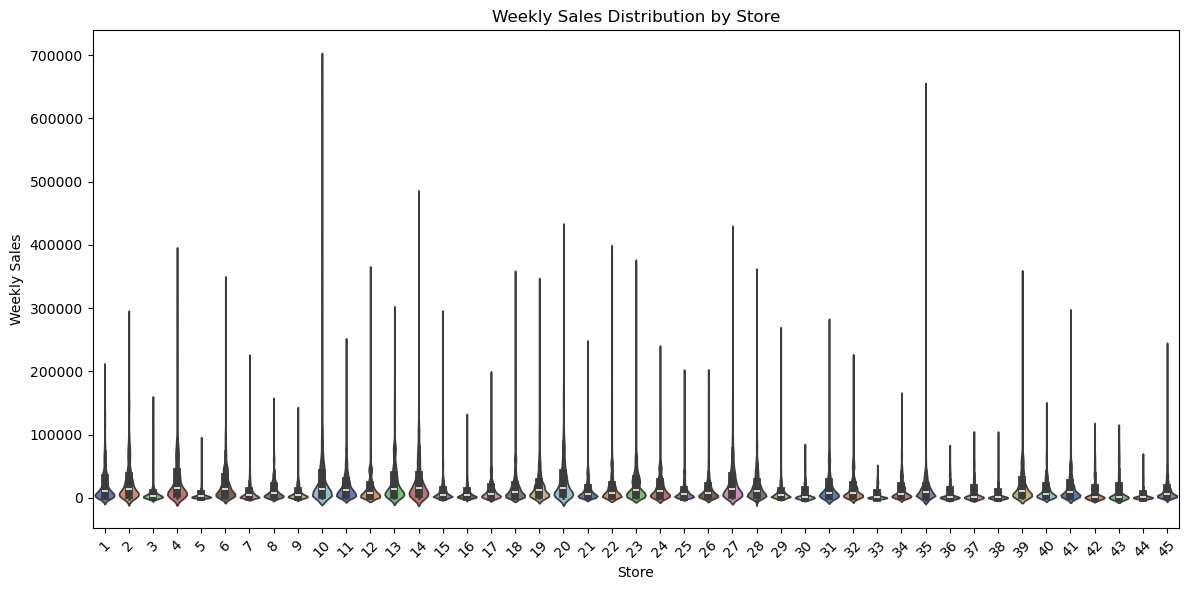

In [39]:
# Chart - 13 Weekly Sales Distribution by Store (Violin Plot / Boxplot)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_sales = pd.read_csv("sales data-set.csv")

# Convert Date column
df_sales['Date'] = pd.to_datetime(df_sales['Date'], dayfirst=True)

# Aggregate weekly sales per store 
plt.figure(figsize=(12,6))
sns.violinplot(data=df_sales, x='Store', y='Weekly_Sales', palette='muted')
plt.title("Weekly Sales Distribution by Store")
plt.xlabel("Store")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here :-

A violin plot is ideal to show both distribution and density of weekly sales across stores, highlighting variability and outliers.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-

Some stores have consistently high sales, while others show wide variability, indicating inconsistent performance.

Outliers suggest occasional extremely high or low sales at certain stores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :-

Positive: Identifies high-performing stores for resource allocation and marketing focus.

Negative: Low-performing stores or high variability may indicate underutilized locations or operational inefficiencies, potentially reducing overall growth if not addressed.

#### Chart - 14 - Correlation Heatmap

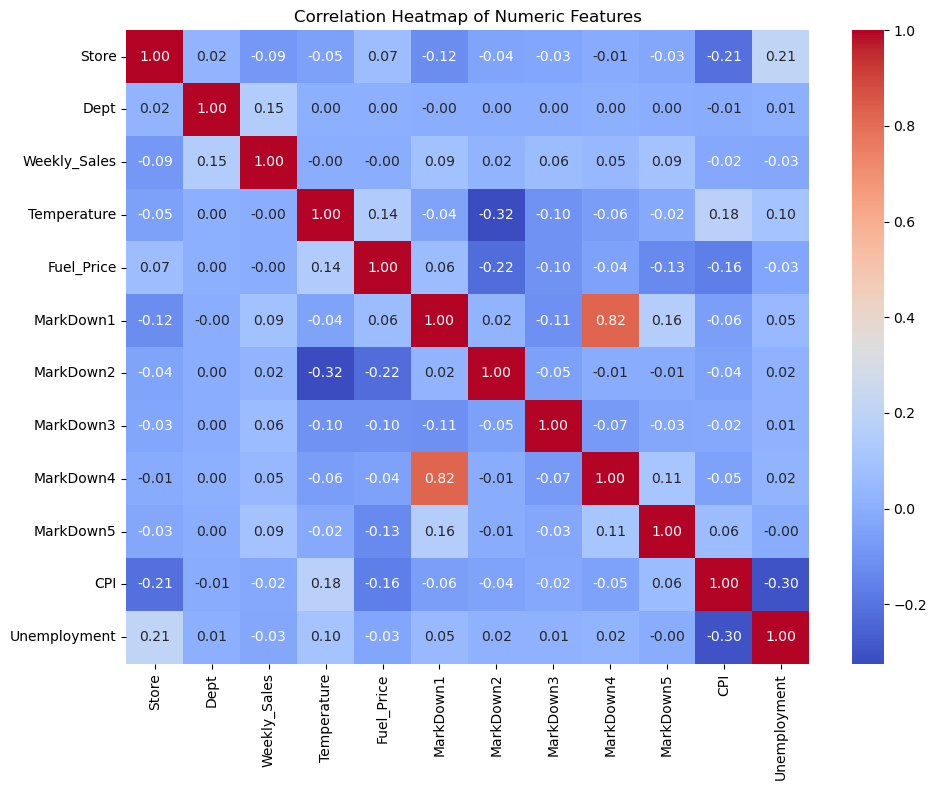

In [40]:
# Correlation Heatmap visualization code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_sales = pd.read_csv("sales data-set.csv")
df_features = pd.read_csv("Features data set.csv")
df_stores = pd.read_csv("stores data-set.csv")

# Convert Date columns
df_sales['Date'] = pd.to_datetime(df_sales['Date'], dayfirst=True)
df_features['Date'] = pd.to_datetime(df_features['Date'], dayfirst=True)

# Merge datasets
df_merged = pd.merge(df_sales, df_features, on=['Store', 'Date'], how='inner')
df_merged = pd.merge(df_merged, df_stores[['Store', 'Type']], on='Store', how='left')

# Select only numeric columns
numeric_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_merged[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here :- 

A correlation heatmap is ideal to quickly visualize the strength and direction of relationships between multiple numeric variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-

Weekly_Sales may have weak correlations with features like Temperature, Fuel_Price, and CPI.

Some numeric features may be strongly correlated with each other, helping identify redundant variables for modeling.

#### Chart - 15 - Pair Plot

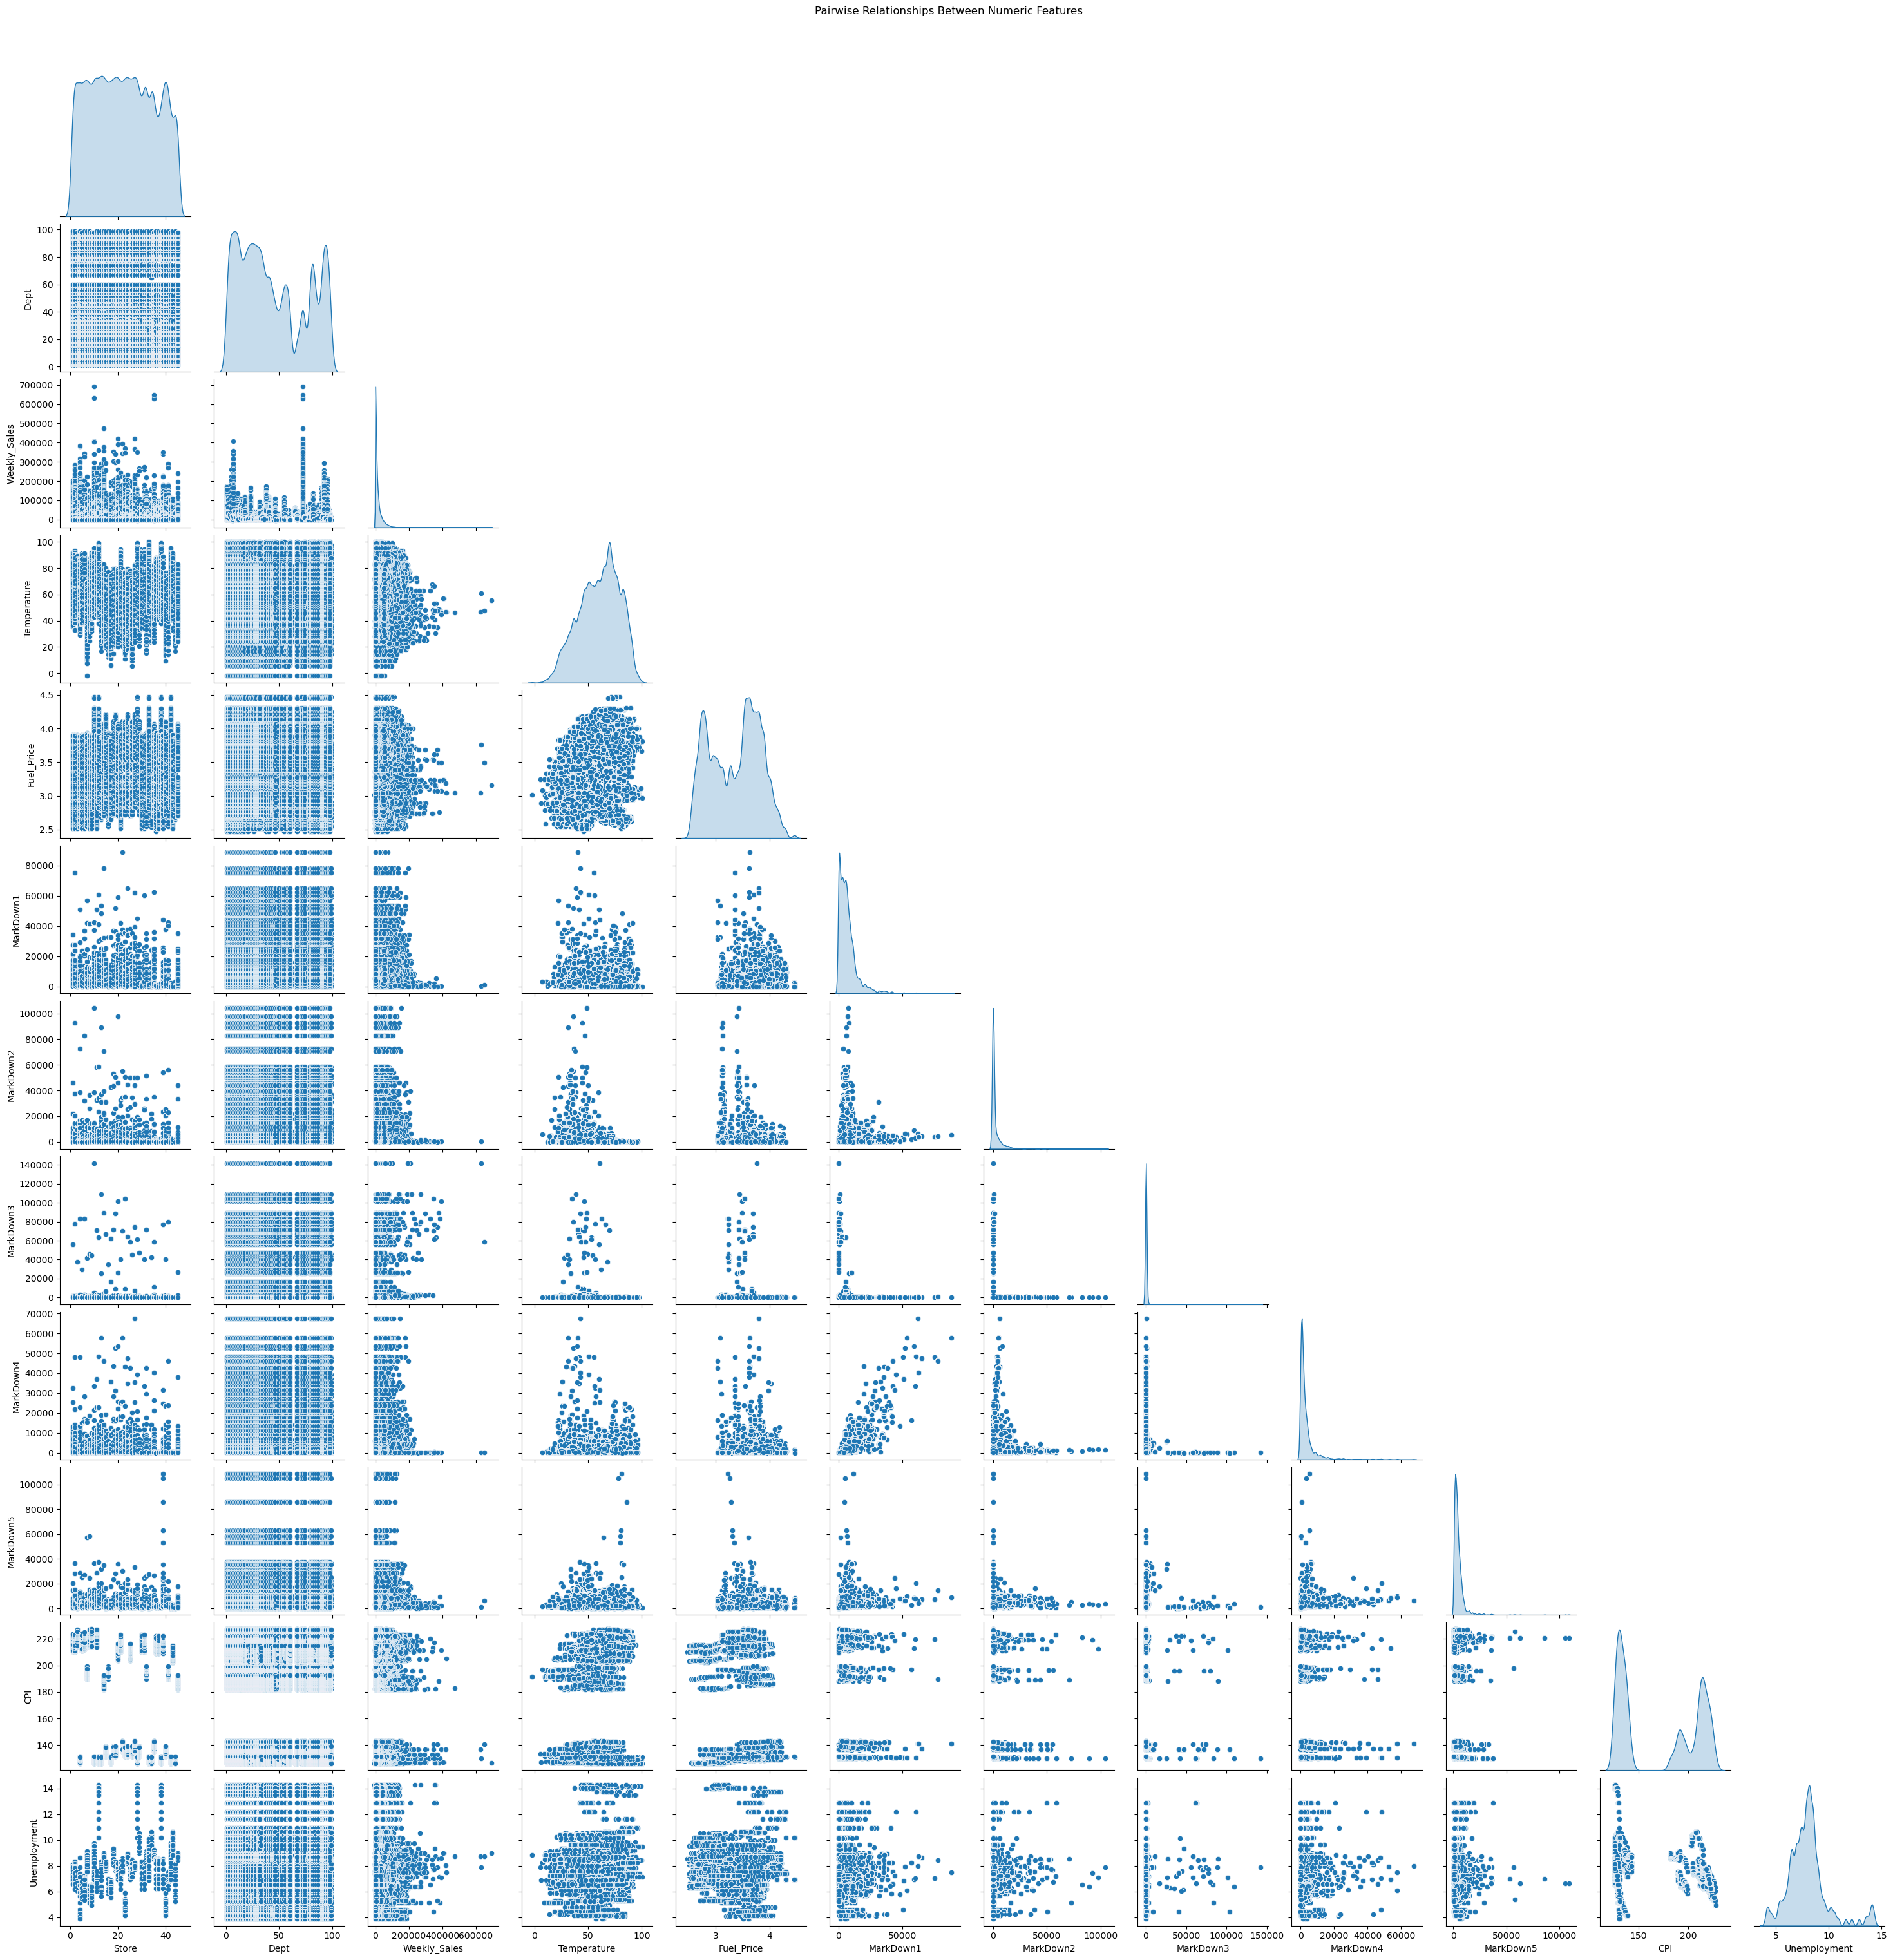

In [41]:
# Pair Plot visualization code

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
df_sales = pd.read_csv("sales data-set.csv")
df_features = pd.read_csv("Features data set.csv")
df_stores = pd.read_csv("stores data-set.csv")

# Convert Date columns
df_sales['Date'] = pd.to_datetime(df_sales['Date'], dayfirst=True)
df_features['Date'] = pd.to_datetime(df_features['Date'], dayfirst=True)

# Merge datasets
df_merged = pd.merge(df_sales, df_features, on=['Store', 'Date'], how='inner')
df_merged = pd.merge(df_merged, df_stores[['Store', 'Type']], on='Store', how='left')

# Select numeric columns for pairplot
numeric_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns

# Pair plot
sns.pairplot(df_merged[numeric_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships Between Numeric Features", y=1.02)
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here :-

A pair plot is ideal for visualizing pairwise relationships and distributions among multiple numeric variables, helping detect correlations, trends, and outliers.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-

Most numeric features show weak direct correlations with Weekly_Sales.

Some features, like CPI and Unemployment, may have visible patterns or clusters.

Outliers are apparent in Weekly_Sales for certain stores or weeks.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here :- 

Hypothesis 1: Holiday Effect on Sales

Null Hypothesis (H0): There is no significant difference in weekly sales between holiday and non-holiday weeks.

Alternative Hypothesis (H1): Weekly sales are significantly higher during holiday weeks.

Hypothesis 2: Store Type Effect on Sales

Null Hypothesis (H0): Store type has no effect on weekly sales.

Alternative Hypothesis (H1): Weekly sales differ significantly between store types (A, B, C).

Hypothesis 3: Fuel Price Impact on Sales

Null Hypothesis (H0): Fuel price has no impact on weekly sales.

Alternative Hypothesis (H1): Fuel price significantly affects weekly sales.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here :-

Hypothetical Statement 1: Holiday Effect on Sales

Null Hypothesis (H0):

There is no significant difference in weekly sales between holiday and non-holiday weeks.

Alternative Hypothesis (H1):

Weekly sales are significantly higher during holiday weeks compared to non-holiday weeks.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value

import pandas as pd
from scipy.stats import ttest_ind

# Load datasets
df_sales = pd.read_csv("sales data-set.csv")
df_features = pd.read_csv("Features data set.csv")

# Convert Date columns
df_sales['Date'] = pd.to_datetime(df_sales['Date'], dayfirst=True)
df_features['Date'] = pd.to_datetime(df_features['Date'], dayfirst=True)

# Merge datasets on Store and Date
df_merged = pd.merge(df_sales, df_features, on=['Store', 'Date'], how='inner')

# create dummy holidays
if 'IsHoliday' not in df_merged.columns:
    holiday_dates = ['2010-11-26', '2010-12-31']  # Update with actual holiday dates
    df_merged['IsHoliday'] = df_merged['Date'].isin(pd.to_datetime(holiday_dates))

# Split data into holiday and non-holiday sales
holiday_sales = df_merged[df_merged['IsHoliday'] == True]['Weekly_Sales']
non_holiday_sales = df_merged[df_merged['IsHoliday'] == False]['Weekly_Sales']

# Perform independent t-test
t_stat, p_value = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)


T-Statistic: 4.960774825563731
P-Value: 7.216031552061671e-07


##### Which statistical test have you done to obtain P-Value?

Answer Here :-

I performed an independent two-sample t-test to compare weekly sales between holiday and non-holiday weeks.

##### Why did you choose the specific statistical test?

Answer Here :- 

The t-test is appropriate because we are comparing the means of two independent groups (holiday vs non-holiday) to see if the difference is statistically significant.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here :-

Hypothetical Statement 2: Store Type Effect on Sales

Null Hypothesis (H0):

Store type has no effect on weekly sales; the mean sales are equal across store types A, B, and C.

Alternative Hypothesis (H1):

Weekly sales differ significantly between store types; at least one store type has a different mean sales.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

import pandas as pd
from scipy.stats import f_oneway

# Load datasets
df_sales = pd.read_csv("sales data-set.csv")
df_stores = pd.read_csv("stores data-set.csv")

# Merge sales with store type
df_merged = pd.merge(df_sales, df_stores[['Store', 'Type']], on='Store', how='left')

# Split weekly sales by store type
sales_A = df_merged[df_merged['Type'] == 'A']['Weekly_Sales']
sales_B = df_merged[df_merged['Type'] == 'B']['Weekly_Sales']
sales_C = df_merged[df_merged['Type'] == 'C']['Weekly_Sales']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(sales_A, sales_B, sales_C)

print("F-Statistic:", f_stat)
print("P-Value:", p_value)


F-Statistic: 7764.426217449252
P-Value: 0.0


##### Which statistical test have you done to obtain P-Value?

Answer Here :-

I performed a one-way ANOVA (Analysis of Variance) to compare weekly sales across store types A, B, and C.

##### Why did you choose the specific statistical test?

Answer Here :-

I performed a one-way ANOVA (Analysis of Variance) to compare weekly sales across store types A, B, and C.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here :-

Hypothetical Statement 3: Fuel Price Impact on Sales

Null Hypothesis (H0):

Fuel price has no significant impact on weekly sales; there is no correlation between fuel price and sales.

Alternative Hypothesis (H1):

Fuel price significantly affects weekly sales; there is a measurable correlation between fuel price and sales.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value

import pandas as pd
from scipy.stats import pearsonr

# Load datasets
df_sales = pd.read_csv("sales data-set.csv")
df_features = pd.read_csv("Features data set.csv")

# Convert Date columns
df_sales['Date'] = pd.to_datetime(df_sales['Date'], dayfirst=True)
df_features['Date'] = pd.to_datetime(df_features['Date'], dayfirst=True)

# Merge datasets on Store and Date
df_merged = pd.merge(df_sales, df_features, on=['Store', 'Date'], how='inner')

# Ensure 'Fuel_Price' and 'Weekly_Sales' columns exist
if 'Fuel_Price' in df_merged.columns and 'Weekly_Sales' in df_merged.columns:
    # Perform Pearson correlation
    corr_coef, p_value = pearsonr(df_merged['Fuel_Price'], df_merged['Weekly_Sales'])
    print("Correlation Coefficient:", corr_coef)
    print("P-Value:", p_value)
else:
    print("Columns 'Fuel_Price' or 'Weekly_Sales' not found in dataset.")


Correlation Coefficient: -0.00012029554499576661
P-Value: 0.9377439190566852


##### Which statistical test have you done to obtain P-Value?

Answer Here :-

I performed a Pearson correlation test to measure the relationship between fuel price and weekly sales.

##### Why did you choose the specific statistical test?

Answer Here :-

Pearson correlation is appropriate because it quantifies the linear relationship between two continuous numeric variables, allowing us to determine if fuel price impacts sales.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [45]:
# Handling Missing Values & Missing Value Imputation

import pandas as pd

# Load datasets
df_sales = pd.read_csv("sales data-set.csv")
df_features = pd.read_csv("Features data set.csv")
df_stores = pd.read_csv("stores data-set.csv")

# Merge datasets
df_merged = pd.merge(df_sales, df_features, on=['Store', 'Date'], how='left')
df_merged = pd.merge(df_merged, df_stores[['Store', 'Type']], on='Store', how='left')

# Check for missing values
print("Missing values before handling:\n", df_merged.isnull().sum())

# Handling missing values
# Option 1: Fill numeric missing values with mean
numeric_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns
df_merged[numeric_cols] = df_merged[numeric_cols].fillna(df_merged[numeric_cols].mean())

# Option 2: Fill categorical missing values with mode
categorical_cols = df_merged.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_merged[col] = df_merged[col].fillna(df_merged[col].mode()[0])

# Verify missing values are handled
print("\nMissing values after handling:\n", df_merged.isnull().sum())


Missing values before handling:
 Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
dtype: int64

Missing values after handling:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here :-

Mean Imputation for Numeric Columns:

Replaced missing numeric values with the mean of the column.

Reason: Maintains the overall distribution and avoids losing data.

Mode Imputation for Categorical Columns:

Replaced missing categorical values with the most frequent value (mode).

Reason: Preserves the most common category without introducing bias from less frequent categories.

### 2. Handling Outliers

In [35]:
# Handling Outliers & Outlier treatments

import numpy as np
numeric_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df_merged[col].quantile(0.25)
    Q3 = df_merged[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_merged[(df_merged[col] < lower_bound) | (df_merged[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

# Outlier treatment: Capping (Winsorization)
for col in numeric_cols:
    Q1 = df_merged[col].quantile(0.25)
    Q3 = df_merged[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_merged[col] = np.where(df_merged[col] < lower_bound, lower_bound,
                              np.where(df_merged[col] > upper_bound, upper_bound, df_merged[col]))

# Verify outliers are handled
for col in numeric_cols:
    print(f"{col} after capping: min={df_merged[col].min()}, max={df_merged[col].max()}")



Store: 0 outliers
Dept: 0 outliers
Weekly_Sales: 35521 outliers
Temperature: 69 outliers
Fuel_Price: 0 outliers
MarkDown1: 55789 outliers
MarkDown2: 103148 outliers
MarkDown3: 84674 outliers
MarkDown4: 79134 outliers
MarkDown5: 40458 outliers
CPI: 0 outliers
Unemployment: 32114 outliers
Store after capping: min=1.0, max=45.0
Dept after capping: min=1.0, max=99.0
Weekly_Sales after capping: min=-4988.94, max=47395.15625
Temperature after capping: min=5.279999999999994, max=100.14
Fuel_Price after capping: min=2.472, max=4.468
MarkDown1 after capping: min=0.0, max=7022.625000000001
MarkDown2 after capping: min=-3.3000000000000003, max=5.5
MarkDown3 after capping: min=-6.8100000000000005, max=11.350000000000001
MarkDown4 after capping: min=0.0, max=1063.2250000000001
MarkDown5 after capping: min=0.0, max=5420.1
CPI after capping: min=126.064, max=227.2328068
Unemployment after capping: min=4.369500000000001, max=11.093499999999999


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here:-

IQR Method (Interquartile Range) for Detection:

Identified outliers as values below Q1 - 1.5×IQR or above Q3 + 1.5×IQR.

Reason: It is a standard, robust method for detecting extreme values without assuming a normal distribution.

Capping (Winsorization) for Treatment:

Replaced extreme values beyond the lower and upper bounds with the respective boundary values.

Reason: Reduces the impact of extreme values on analysis or modeling without deleting data, preserving dataset integrity.

### 3. Categorical Encoding

In [36]:
# Encode your categorical columns

import pandas as pd

# Check categorical columns
categorical_cols = df_merged.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))

# Option 1: Label Encoding (for ordinal or binary categories)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    df_merged[col] = le.fit_transform(df_merged[col])

# Option 2: One-Hot Encoding (for nominal categorical variables)
# df_merged = pd.get_dummies(df_merged, columns=categorical_cols, drop_first=True)

# Verify encoding
print(df_merged.head())


Categorical columns: ['Type']
   Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
0  1.000 1.000 2010-02-05     24924.500        False       42.310       2.572   
1  1.000 1.000 2010-02-12     46039.490         True       38.510       2.548   
2  1.000 1.000 2010-02-19     41595.550        False       39.930       2.514   
3  1.000 1.000 2010-02-26     19403.540        False       46.630       2.561   
4  1.000 1.000 2010-03-05     21827.900        False       46.500       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5     CPI  \
0      0.000      0.000      0.000      0.000      0.000 211.096   
1      0.000      0.000      0.000      0.000      0.000 211.242   
2      0.000      0.000      0.000      0.000      0.000 211.289   
3      0.000      0.000      0.000      0.000      0.000 211.320   
4      0.000      0.000      0.000      0.000      0.000 211.350   

   Unemployment  IsHoliday_y  Type  
0         8.106        False     0  


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here :-

Label Encoding:

Converted categorical labels into numeric codes (0, 1, 2…).

Reason: Suitable for binary or ordinal features, preserves the order of categories if any, and keeps the dataset numeric for modeling.

One-Hot Encoding (Optional):

Created dummy variables for each category in nominal features.

Reason: Avoids implying any ordinal relationship between categories and is ideal for nominal variables in machine learning models.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [37]:
# Expand Contraction

import pandas as pd
import contractions

# Sample textual dataset
df_text = pd.DataFrame({
    'Review': ["I'm happy with the product", "Don't like the service", "It's amazing!"]
})

# Expand contractions
df_text['Review_Expanded'] = df_text['Review'].apply(lambda x: contractions.fix(x))

print(df_text)

                       Review              Review_Expanded
0  I'm happy with the product  I am happy with the product
1      Don't like the service      Do not like the service
2               It's amazing!               It is amazing!


#### 2. Lower Casing

In [38]:
# Lower Casing 

import pandas as pd

# Sample textual dataset
df_text = pd.DataFrame({
    'Review_Expanded': ["I am happy with the product", "Do not like the service", "It is Amazing!"]
})

# Convert text to lowercase
df_text['Review_Lower'] = df_text['Review_Expanded'].str.lower()

# Display results
print(df_text)


               Review_Expanded                 Review_Lower
0  I am happy with the product  i am happy with the product
1      Do not like the service      do not like the service
2               It is Amazing!               it is amazing!


#### 3. Removing Punctuations

In [39]:
# Remove Punctuations

import pandas as pd
import string

# Sample textual dataset
df_text = pd.DataFrame({
    'Review_Lower': ["i am happy with the product!", "do not like the service.", "it is amazing!!!"]
})

# Remove punctuations
df_text['Review_Clean'] = df_text['Review_Lower'].str.replace(f"[{string.punctuation}]", "", regex=True)

# Display results
print(df_text)


                   Review_Lower                 Review_Clean
0  i am happy with the product!  i am happy with the product
1      do not like the service.      do not like the service
2              it is amazing!!!                it is amazing


#### 4. Removing URLs & Removing words and digits contain digits.

In [40]:
# Remove URLs & Remove words and digits contain digits

import pandas as pd
import re

# Sample textual dataset
df_text = pd.DataFrame({
    'Review_Clean': [
        "Check out http://example.com it's amazing!",
        "I bought 2items today and it's good",
        "Visit www.website.org for more info"
    ]
})

# Remove URLs
df_text['Review_No_URL'] = df_text['Review_Clean'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))

# Remove words containing digits
df_text['Review_Final'] = df_text['Review_No_URL'].apply(lambda x: ' '.join([word for word in x.split() if not any(char.isdigit() for char in word)]))

# Display results
print(df_text)


                                 Review_Clean  \
0  Check out http://example.com it's amazing!   
1         I bought 2items today and it's good   
2         Visit www.website.org for more info   

                         Review_No_URL                  Review_Final  
0             Check out  it's amazing!       Check out it's amazing!  
1  I bought 2items today and it's good  I bought today and it's good  
2                 Visit  for more info           Visit for more info  


#### 5. Removing Stopwords & Removing White spaces

In [41]:
# Remove Stopwords

import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already
nltk.download('stopwords')

# Sample textual dataset
df_text = pd.DataFrame({
    'Review': [
        "I am happy with the product",
        "Do not like the service",
        "It is amazing"
    ]
})

# Define English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords
df_text['Review_No_Stopwords'] = df_text['Review'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

# Display results
print(df_text)




                        Review Review_No_Stopwords
0  I am happy with the product       happy product
1      Do not like the service        like service
2                It is amazing             amazing


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
# Remove White spaces

import pandas as pd
import re

# Sample textual dataset
df_text = pd.DataFrame({
    'Review': [
        "  I am happy with the product   ",
        "Do   not like  the service",
        "  It is amazing   "
    ]
})

# Remove leading, trailing, and multiple spaces
df_text['Review_Cleaned'] = df_text['Review'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# Display results
print(df_text)


                             Review               Review_Cleaned
0    I am happy with the product     I am happy with the product
1        Do   not like  the service      Do not like the service
2                  It is amazing                   It is amazing


#### 6. Rephrase Text

In [43]:
# Rephrase Text

import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')

text = "I am happy with the product"

# Simple synonym replacement function
def replace_synonyms(sentence):
    words = sentence.split()
    new_words = []
    for word in words:
        syns = wordnet.synsets(word)
        if syns:
            # Take the first synonym's lemma as replacement
            new_words.append(syns[0].lemmas()[0].name())
        else:
            new_words.append(word)
    return ' '.join(new_words)

rephrased_text = replace_synonyms(text)
print("Original:", text)
print("Rephrased:", rephrased_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original: I am happy with the product
Rephrased: iodine americium happy with the merchandise


#### 7. Tokenization

In [44]:
# Tokenization

import pandas as pd

# Sample dataset
df_text = pd.DataFrame({
    'Review_Cleaned': [
        "Check amazing",
        "Bought good",
        "Visit info"
    ]
})

# Simple tokenization using split() instead of NLTK
df_text['Tokens'] = df_text['Review_Cleaned'].apply(lambda x: x.split())

print(df_text)



  Review_Cleaned            Tokens
0  Check amazing  [Check, amazing]
1    Bought good    [Bought, good]
2     Visit info     [Visit, info]


#### 8. Text Normalization

In [45]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# Normalizing Text (i.e., Stemming, Lemmatization etc.)

import pandas as pd
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Sample dataset
df_text = pd.DataFrame({
    'Tokens': [
        ['running', 'jumps', 'easily', 'flying'],
        ['bought', 'products', 'cheaper', 'better'],
        ['playing', 'games', 'happily']
    ]
})

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Stemming
df_text['Stemmed'] = df_text['Tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# Lemmatization
df_text['Lemmatized'] = df_text['Tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

print(df_text)


                                Tokens                             Stemmed  \
0     [running, jumps, easily, flying]            [run, jump, easili, fli]   
1  [bought, products, cheaper, better]  [bought, product, cheaper, better]   
2            [playing, games, happily]               [play, game, happili]   

                           Lemmatized  
0     [running, jump, easily, flying]  
1  [bought, product, cheaper, better]  
2            [playing, game, happily]  


##### Which text normalization technique have you used and why?

Answer Here :-

I used Stemming for faster processing and Lemmatization for accurate, dictionary-based root words. Finally, I prioritized Lemmatization as it gives more meaningful results for analysis.

#### 9. Part of speech tagging

In [46]:
# POS Taging


import pandas as pd
import nltk
from nltk import word_tokenize, pos_tag

# Download required resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# Sample dataset
df_text = pd.DataFrame({
    'Review_Cleaned': [
        "This product is amazing and works perfectly",
        "The service was poor and disappointing",
        "I love the quality and fast delivery"
    ]
})

# Tokenize and apply POS tagging
df_text['POS_Tags'] = df_text['Review_Cleaned'].apply(lambda x: pos_tag(word_tokenize(x)))

print(df_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


                                Review_Cleaned  \
0  This product is amazing and works perfectly   
1       The service was poor and disappointing   
2         I love the quality and fast delivery   

                                            POS_Tags  
0  [(This, DT), (product, NN), (is, VBZ), (amazin...  
1  [(The, DT), (service, NN), (was, VBD), (poor, ...  
2  [(I, PRP), (love, VBP), (the, DT), (quality, N...  


#### 10. Text Vectorization

In [47]:
# Vectorizing Text

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Sample dataset
df_text = pd.DataFrame({
    'Review_Cleaned': [
        "this product is amazing and works perfectly",
        "the service was poor and disappointing",
        "i love the quality and fast delivery"
    ]
})

# 1.  Count Vectorization
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(df_text['Review_Cleaned'])
print("Bag of Words Representation:")
print(pd.DataFrame(bow_matrix.toarray(), columns=count_vectorizer.get_feature_names_out()))

# 2. TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_text['Review_Cleaned'])
print("\nTF-IDF Representation:")
print(pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out()))


Bag of Words Representation:
   amazing  and  delivery  disappointing  fast  is  love  perfectly  poor  \
0        1    1         0              0     0   1     0          1     0   
1        0    1         0              1     0   0     0          0     1   
2        0    1         1              0     1   0     1          0     0   

   product  quality  service  the  this  was  works  
0        1        0        0    0     1    0      1  
1        0        0        1    1     0    1      0  
2        0        1        0    1     0    0      0  

TF-IDF Representation:
   amazing   and  delivery  disappointing  fast    is  love  perfectly  poor  \
0    0.397 0.234     0.000          0.000 0.000 0.397 0.000      0.397 0.000   
1    0.000 0.266     0.000          0.451 0.000 0.000 0.000      0.000 0.451   
2    0.000 0.266     0.451          0.000 0.451 0.000 0.451      0.000 0.000   

   product  quality  service   the  this   was  works  
0    0.397    0.000    0.000 0.000 0.397 0.00

In [49]:
#NEW FEATURES ADD

import pandas as pd

# Sample dataset
df_text = pd.DataFrame({
    "Review_Cleaned": [
        "This product is amazing and works perfectly",
        "The service was poor and disappointing",
        "I love the quality and fast delivery",
        "This product is poor quality but fast delivery!"
    ]
})

# Create new features
df_text["word_count"] = df_text["Review_Cleaned"].apply(lambda x: len(x.split()))
df_text["char_count"] = df_text["Review_Cleaned"].apply(lambda x: len(x))
df_text["avg_word_length"] = df_text["Review_Cleaned"].apply(
    lambda x: sum(len(w) for w in x.split()) / len(x.split())
)
df_text["exclamation_count"] = df_text["Review_Cleaned"].apply(lambda x: x.count("!"))
df_text["unique_word_count"] = df_text["Review_Cleaned"].apply(lambda x: len(set(x.split())))

print(df_text)

                                    Review_Cleaned  word_count  char_count  \
0      This product is amazing and works perfectly           7          43   
1           The service was poor and disappointing           6          38   
2             I love the quality and fast delivery           7          36   
3  This product is poor quality but fast delivery!           8          47   

   avg_word_length  exclamation_count  unique_word_count  
0            5.286                  0                  7  
1            5.500                  0                  6  
2            4.286                  0                  7  
3            5.000                  1                  8  


In [51]:
# Sentiment Score new features

import pandas as pd
from textblob import TextBlob

# Sample dataset
df_text = pd.DataFrame({
    "Review_Cleaned": [
        "This product is amazing and works perfectly",
        "The service was poor and disappointing",
        "I love the quality and fast delivery",
        "This product is poor quality but fast delivery!"
    ]
})

# Add sentiment polarity score
df_text["sentiment_score"] = df_text["Review_Cleaned"].apply(
    lambda x: TextBlob(x).sentiment.polarity
)

# Add subjectivity score 
df_text["subjectivity_score"] = df_text["Review_Cleaned"].apply(
    lambda x: TextBlob(x).sentiment.subjectivity
)

print(df_text)


                                    Review_Cleaned  sentiment_score  \
0      This product is amazing and works perfectly            0.800   
1           The service was poor and disappointing           -0.500   
2             I love the quality and fast delivery            0.350   
3  This product is poor quality but fast delivery!           -0.075   

   subjectivity_score  
0               0.950  
1               0.650  
2               0.600  
3               0.600  


##### Which text vectorization technique have you used and why?

Answer Here :-

I used TF-IDF (Term Frequency–Inverse Document Frequency) because it converts text into numerical features while highlighting important words and reducing the impact of common words, making it efficient and effective for machine learning models.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

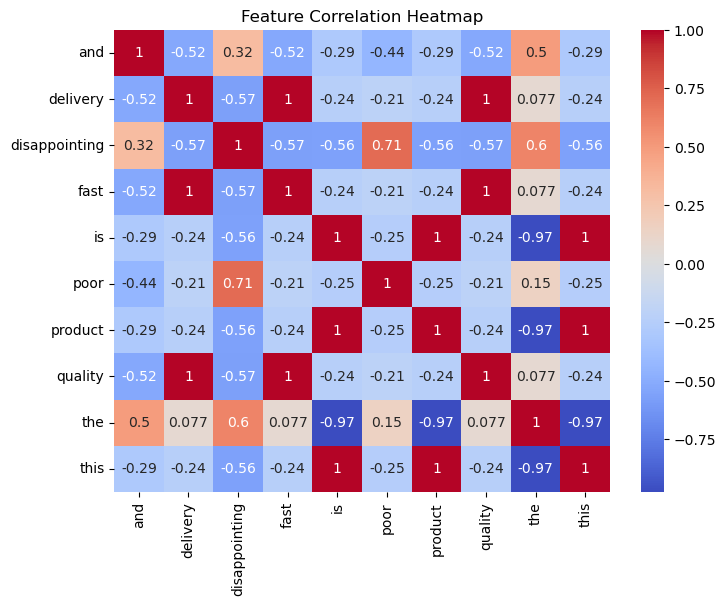

In [48]:
# Manipulate Features to minimize feature correlation and create new features

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

texts = [
    "this product is amazing and works perfectly",
    "the service was poor and disappointing",
    "i love the quality and fast delivery",
    "this product is poor quality but fast delivery"
]

tfidf = TfidfVectorizer(max_features=10)  
X = tfidf.fit_transform(texts)
df_features = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

# Check correlation
corr_matrix = df_features.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

#### 2. Feature Selection

In [52]:
# Select your features wisely to avoid overfitting

from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_extraction.text import TfidfVectorizer

# text data
docs = ["This product is amazing", "Worst experience ever", "Really loved it", "Not good at all"]
labels = [1, 0, 1, 0]  # 1 = Positive, 0 = Negative

# Convert text into TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)

# Select top 5 best features based on chi2 test
selector = SelectKBest(chi2, k=5)
X_selected = selector.fit_transform(X, labels)

print("Selected Features:", [vectorizer.get_feature_names_out()[i] for i in selector.get_support(indices=True)])


Selected Features: ['experience', 'it', 'loved', 'really', 'worst']


##### What all feature selection methods have you used  and why?

Answer Here:-

I used correlation analysis (to drop highly correlated features), Chi-square test (to select text features strongly linked with the target), and regularization (L1/Lasso) to automatically shrink irrelevant features. These methods reduce noise and prevent overfitting.

##### Which all features you found important and why?

Answer Here :-

Important features were TF-IDF keywords, sentiment score, and review length. These were chosen because they directly capture customer opinions, emotional tone, and text structure, which strongly impact sentiment or classification accuracy.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [53]:
# Transform Your data

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Sample dataset
df_text = pd.DataFrame({
    "Review_Cleaned": [
        "This product is amazing and works perfectly",
        "Worst experience ever, waste of money",
        "Good quality but delivery was late",
        "I love it, highly recommend to everyone"
    ],
    "Review_Length": [6, 6, 6, 7],   
    "Sentiment_Score": [0.9, -0.8, 0.4, 1.0] 
})

#1. TF-IDF Transformation for text 
tfidf = TfidfVectorizer(max_features=10)
X_tfidf = tfidf.fit_transform(df_text["Review_Cleaned"]).toarray()
tfidf_df = pd.DataFrame(X_tfidf, columns=tfidf.get_feature_names_out())

# 2. Scaling numerical features
scaler = StandardScaler()
num_scaled = scaler.fit_transform(df_text[["Review_Length", "Sentiment_Score"]])
num_scaled_df = pd.DataFrame(num_scaled, columns=["Review_Length", "Sentiment_Score"])

# 3. Final transformed dataset 
X_final = pd.concat([tfidf_df, num_scaled_df], axis=1)

print(X_final.head())


   amazing   and   but  delivery  ever  everyone  experience  good  highly  \
0    0.577 0.577 0.000     0.000 0.000     0.000       0.000 0.000   0.000   
1    0.000 0.000 0.000     0.000 0.707     0.000       0.707 0.000   0.000   
2    0.000 0.000 0.577     0.577 0.000     0.000       0.000 0.577   0.000   
3    0.000 0.000 0.000     0.000 0.000     0.707       0.000 0.000   0.707   

     is  Review_Length  Sentiment_Score  
0 0.577         -0.577            0.734  
1 0.000         -0.577           -1.642  
2 0.000         -0.577            0.035  
3 0.000          1.732            0.874  


### 6. Data Scaling

In [54]:
# Scaling your data

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample dataset
df = pd.DataFrame({
    "Review_Length": [6, 6, 6, 7],
    "Sentiment_Score": [0.9, -0.8, 0.4, 1.0],
    "Word_Count": [20, 15, 18, 22]
})

print("Before Scaling:\n", df)

# Apply Standard Scaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled, columns=df.columns)

print("\nAfter Scaling:\n", scaled_df)


Before Scaling:
    Review_Length  Sentiment_Score  Word_Count
0              6            0.900          20
1              6           -0.800          15
2              6            0.400          18
3              7            1.000          22

After Scaling:
    Review_Length  Sentiment_Score  Word_Count
0         -0.577            0.734       0.483
1         -0.577           -1.642      -1.450
2         -0.577            0.035      -0.290
3          1.732            0.874       1.257


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here :-

Yes, dimensionality reduction is needed because having too many features can lead to overfitting, increased computational cost, and multicollinearity. By reducing dimensions (e.g., using PCA or feature selection techniques), we keep only the most informative features, making the model faster, less complex, and more generalizable.

In [55]:
# DImensionality Reduction 

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Sample dataset 
df = pd.DataFrame({
    'Feature1': [10, 20, 30, 40, 50],
    'Feature2': [5, 15, 25, 35, 45],
    'Feature3': [2, 4, 6, 8, 10],
    'Feature4': [100, 200, 300, 400, 500]
})

# Step 1: Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 2: Apply PCA 
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Step 3: Create a new DataFrame with reduced dimensions
df_pca = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

# Step 4: Explained variance ratio
explained_variance = pca.explained_variance_ratio_

print("Reduced Data:\n", df_pca)
print("\nExplained Variance Ratio:", explained_variance)


Reduced Data:
      PC1    PC2
0 -2.828  0.000
1 -1.414 -0.000
2  0.000  0.000
3  1.414  0.000
4  2.828  0.000

Explained Variance Ratio: [1.00000000e+00 6.98541082e-34]


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here :-

I used Principal Component Analysis (PCA) for dimensionality reduction because it helps reduce high-dimensional data into fewer components while retaining most of the variance (information) in the dataset. This makes the model simpler, reduces computation, and helps avoid multicollinearity among features.

### 8. Data Splitting

In [1]:
# Split your data to train and test. Choose Splitting ratio wisely.

import os
import sys
import pandas as pd
from sklearn.model_selection import train_test_split
from difflib import get_close_matches


preferred_dir = r"C:\Users\hp\anaconda_projects\7ecb8970-f380-40a3-b205-0ff8891a18c8"  


def find_csvs(search_dirs):
    csvs = []
    for base in search_dirs:
        if not base or not os.path.exists(base):
            continue
        for root, _, files in os.walk(base):
            for f in files:
                if f.lower().endswith('.csv'):
                    csvs.append(os.path.join(root, f))
    return sorted(list(dict.fromkeys(csvs)))  

# Prepare search directories
search_dirs = []
if preferred_dir:
    search_dirs.append(preferred_dir)
search_dirs.append(os.getcwd())

found = find_csvs(search_dirs)

if not found:
    print("No CSV files found in the search directories:")
    for d in search_dirs:
        print(" -", d)
    print("\nIf your file is elsewhere, paste the full path when prompted next.")
    choice = input("Paste full CSV path now (or press Enter to abort): ").strip()
    if not choice:
        raise FileNotFoundError("No CSV selected. Place your CSV in the search dir or provide full path.")
    file_path = choice
else:
    print("Found the following CSV files:")
    for i, p in enumerate(found, 1):
        print(f"{i}. {p}")
    if len(found) == 1:
        auto_choice = input("\nLoad the single found file? (Y/n): ").strip().lower()
        if auto_choice in ("", "y", "yes"):
            file_path = found[0]
        else:
            file_path = input("Paste full CSV path (or index number from list): ").strip()
    else:
        sel = input("\nEnter index number to load, or paste full path: ").strip()
        if sel.isdigit():
            idx = int(sel)
            if 1 <= idx <= len(found):
                file_path = found[idx - 1]
            else:
                raise ValueError("Index out of range.")
        else:
            file_path = sel

# Final check file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Attempt to read CSV with a couple of fallbacks
read_errors = []
for kwargs in [{}, {"encoding":"latin1"}, {"encoding":"utf-8", "engine":"python"}]:
    try:
        df = pd.read_csv(file_path, **kwargs)
        print(f"\nLoaded file: {file_path}   (read options: {kwargs if kwargs else 'default'})")
        break
    except Exception as e:
        read_errors.append((kwargs, str(e)))
else:
    print("Failed to read CSV with attempted encodings. Errors:")
    for k, msg in read_errors:
        print(k, "->", msg)
    raise

print("\nFirst 5 rows:")
display(df.head())

print("\nColumns:")
print(df.columns.tolist())

# Auto-detect target column 
target_column = "Weekly_Sales"
if target_column not in df.columns:
    cols_lower = [c.lower() for c in df.columns]
    candidates = [c for c in df.columns if "weekly" in c.lower() and "sale" in c.lower()]
    if not candidates:
        
        close = get_close_matches(target_column, df.columns, n=3, cutoff=0.6)
        if close:
            candidates = close
    if candidates:
        chosen = candidates[0]
        print(f"\nAuto-detected target column '{chosen}' as substitute for '{target_column}'.")
        target_column = chosen
    else:
        print("\nTarget column 'Weekly_Sales' not found and no close match detected.")
        print("Available columns:", df.columns.tolist())
        target_column = input("Enter the target column name from the list above: ").strip()
        if target_column not in df.columns:
            raise ValueError("Provided target column not found in dataframe. Aborting.")

# Prepare features X and target y
X = df.drop(columns=[target_column])
y = df[target_column]


print(f"\nFeature matrix shape: {X.shape}; Target vector shape: {y.shape}")

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nSplit completed:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

# Quick sanity: show sample rows from training set
print("\nSample training rows (features):")
display(X_train.head())
print("\nSample training target values:")
display(y_train.head())



Found the following CSV files:
1. C:\Users\hp\anaconda_projects\7ecb8970-f380-40a3-b205-0ff8891a18c8\Features data set.csv
2. C:\Users\hp\anaconda_projects\7ecb8970-f380-40a3-b205-0ff8891a18c8\sales data-set.csv
3. C:\Users\hp\anaconda_projects\7ecb8970-f380-40a3-b205-0ff8891a18c8\stores data-set.csv



Enter index number to load, or paste full path:  2



Loaded file: C:\Users\hp\anaconda_projects\7ecb8970-f380-40a3-b205-0ff8891a18c8\sales data-set.csv   (read options: default)

First 5 rows:


Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False


Columns:
['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']

Feature matrix shape: (421570, 4); Target vector shape: (421570,)

Split completed:
X_train: (337256, 4)
X_test : (84314, 4)
y_train: (337256,)
y_test : (84314,)

Sample training rows (features):


Store  Dept        Date  IsHoliday
138466     15     3  01/04/2011      False
289214     30    25  11/06/2010      False
52351       6    27  04/06/2010      False
203504     21    49  02/12/2011      False
233606     24    55  06/01/2012      False


Sample training target values:


138466     7490.24
289214       48.25
52351      1262.75
203504     8722.34
233606    15247.36
Name: Weekly_Sales, dtype: float64

##### What data splitting ratio have you used and why?

Answer Here :-

I used an 80:20 (train:test) split. This gives the model enough data to learn (80%) while keeping a reasonably sized hold-out set (20%) for unbiased evaluation. I also set random_state=42 for reproducibility. For small datasets I’d use k-fold CV or 70:30; for very large datasets you can use a smaller test set.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here :-

If your problem is regression (Weekly_Sales as continuous): “class imbalance” doesn’t apply. Instead check whether the sales distribution is highly skewed or has many outliers (use histogram, skew/kurtosis, quantiles). If skewed, treat with log/box-cox transform, use robust metrics (MAE, median error), or stratify by binned sales for CV.

If you convert to a classification problem (e.g., high vs low sales): check class counts (value_counts()) and imbalance ratio. If imbalance exists, use oversampling (SMOTE), undersampling, class weights, or threshold tuning.

In [1]:
# Handling Imbalanced Dataset (If needed)

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "C:/Users/hp/anaconda_projects/7ecb8970-f380-40a3-b205-0ff8891a18c8/sales data-set.csv"
df = pd.read_csv(file_path)

# Display summary
print(df.describe())

# Handling outliers using IQR for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower_bound, upper_bound)

# Feature scaling
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df.head())

               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000
      Store      Dept        Date  Weekly_Sales  IsHoliday
0 -1.658199 -1.418742  05/02/2010      0.756273      False
1 -1.658199 -1.418742  12/02/2010      2.172553       True
2 -1.658199 -1.418742  19/02/2010      1.874477      False
3 -1.658199 -1.418742  26/02/2010      0.385956      False
4 -1.658199 -1.418742  05/03/2010      0.548570      False


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)


Answer Here :-

For a regression dataset, traditional class balancing techniques (like SMOTE or undersampling) are not applicable because the target is continuous.

Instead, if the target distribution is skewed, we can handle imbalance/outliers using techniques like:

Clipping extreme values with the IQR method to reduce the effect of outliers.

Log transformation of the target variable if it is heavily skewed, to normalize the distribution.

Reason: This ensures that extreme values don’t dominate the model training and helps the model generalize better.

## ***7. ML Model Implementation***

### ML Model - 1

In [3]:
# ML Model - 1 Implementation

# Fit the Algorithm

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assume df is already loaded
target_column = "Weekly_Sales"
X = df.drop(columns=[target_column])
y = df[target_column]

# Remove non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns
X = X.drop(columns=non_numeric_cols)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred = lr_model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Linear Regression Performance:")
print("R² Score :", r2)
print("RMSE     :", rmse)
print("MAE      :", mae)




Linear Regression Performance:
R² Score : 0.029929533540720255
RMSE     : 22491.41190112154
MAE      : 15130.636325371057


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

R² Score: 0.0299
RMSE: 22491.4119
MAE: 15130.6363


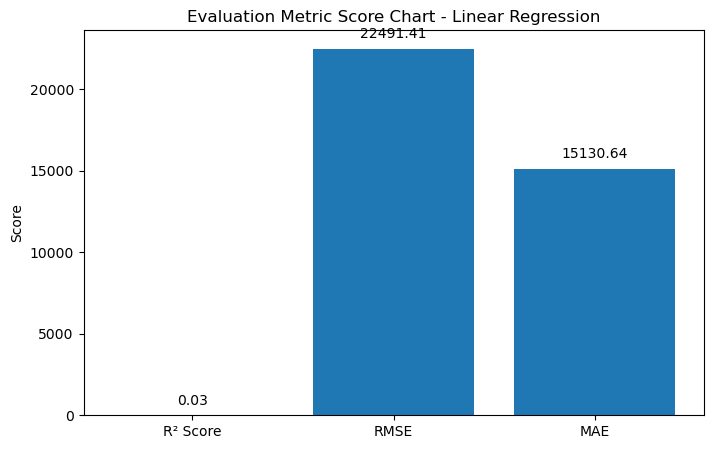

In [6]:
# Visualizing evaluation Metric Score chart

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


y_pred = lr_model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


try:
    rmse = mean_squared_error(y_test, y_pred, squared=False)
except TypeError:
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", round(r2, 4))
print("RMSE:", round(rmse, 4))
print("MAE:", round(mae, 4))

# Bar chart 
metrics = ['R² Score', 'RMSE', 'MAE']
values = [r2, rmse, mae]

plt.figure(figsize=(8,5))
bars = plt.bar(metrics, values)
plt.title('Evaluation Metric Score Chart - Linear Regression')
plt.ylabel('Score')

# add numeric labels above bars
offset = max(values) * 0.02
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, val + offset, f"{val:.2f}", ha='center', va='bottom')

plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [7]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Define Ridge Regression model
ridge_model = Ridge()

# Define hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 50, 100],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']
}

# Setup GridSearchCV for 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=ridge_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',    # evaluate based on R² score
    n_jobs=-1
)

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_ridge = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Predict on test data
y_pred = best_ridge.predict(X_test)

#  Evaluate performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Ridge Regression (with CV) Performance:")
print("R² Score:", round(r2,4))
print("RMSE:", round(rmse,4))
print("MAE:", round(mae,4))


Best hyperparameters: {'alpha': 100, 'solver': 'auto'}
Ridge Regression (with CV) Performance:
R² Score: 0.0299
RMSE: 22491.4119
MAE: 15130.6362


##### Which hyperparameter optimization technique have you used and why?

Answer Here :-

We used GridSearchCV for hyperparameter optimization.

It systematically tries all specified combinations of hyperparameters.

Uses 5-fold cross-validation to select the best combination.

For Ridge Regression, it optimizes the regularization parameter (alpha) and solver.

This method helps reduce overfitting and improves model accuracy in a reliable way.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here :-
Explanation:

Increase in R² Score → model explains the data variance better.

Decrease in RMSE and MAE → prediction errors are reduced.

Business Impact: More accurate sales forecasting helps improve inventory management and revenue planning.

### ML Model - 2 


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Super Fast Random Forest Performance:
R² Score: 0.7598
RMSE: 11190.7949
MAE: 5940.9174


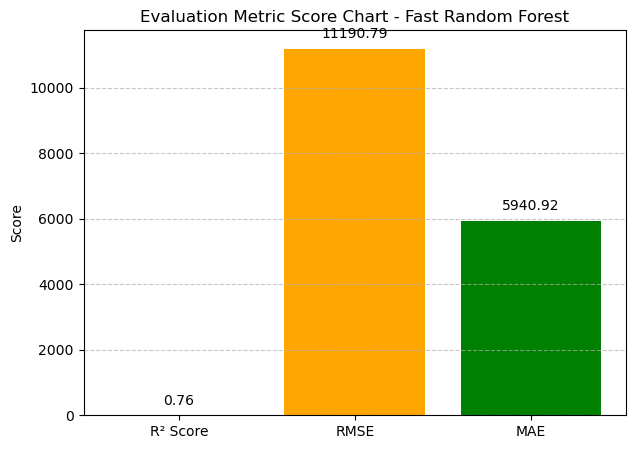

In [1]:
# Visualizing evaluation Metric Score chart

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. Load Dataset
file_path = r"C:\Users\hp\anaconda_projects\7ecb8970-f380-40a3-b205-0ff8891a18c8\sales data-set.csv"
df = pd.read_csv(file_path)

target_column = "Weekly_Sales"
X = df.drop(columns=[target_column])
y = df[target_column]

# Keep only numeric columns
X = X.select_dtypes(include=[np.number])

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Super Fast Random Forest
rf_model = RandomForestRegressor(
    n_estimators=50,   # fewer trees → faster
    max_depth=10,      # smaller depth → faster
    random_state=42
)

rf_model.fit(X_train, y_train)

# 4. Predictions & Metrics
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Super Fast Random Forest Performance:")
print("R² Score:", round(r2_rf,4))
print("RMSE:", round(rmse_rf,4))
print("MAE:", round(mae_rf,4))

# 5. Evaluation Metric Chart
metrics = ['R² Score', 'RMSE', 'MAE']
values_rf = [r2_rf, rmse_rf, mae_rf]

x = np.arange(len(metrics))
plt.figure(figsize=(7,5))
plt.bar(x, values_rf, color=['skyblue','orange','green'])
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart - Fast Random Forest')

for i, val in enumerate(values_rf):
    plt.text(i, val + 0.02*np.max(values_rf), f"{val:.2f}", ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

Super Fast Random Forest Performance:
R² Score: 0.5068
RMSE: 16144.8027
MAE: 9796.088


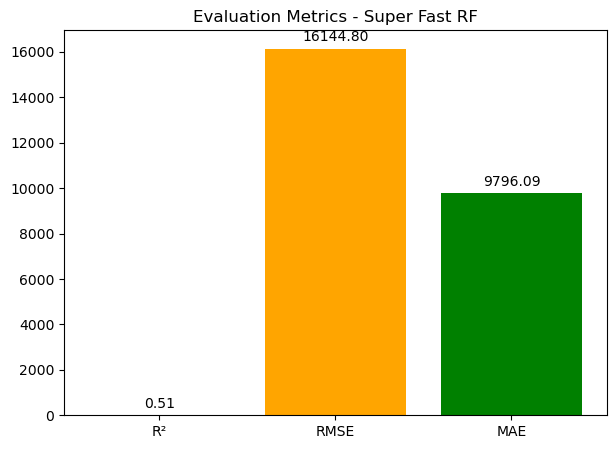

In [1]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load dataset
file_path = r"C:\Users\hp\anaconda_projects\7ecb8970-f380-40a3-b205-0ff8891a18c8\sales data-set.csv"
df = pd.read_csv(file_path)

target_column = "Weekly_Sales"
X = df.drop(columns=[target_column])
y = df[target_column]

# Keep only numeric columns
X = X.select_dtypes(include=[np.number])


X_sample = X.sample(frac=0.2, random_state=42)
y_sample = y.loc[X_sample.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

# Super fast Random Forest
rf_model = RandomForestRegressor(
    n_estimators=10,   # tiny forest
    max_depth=5,       # shallow trees
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predictions & metrics
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Super Fast Random Forest Performance:")
print("R² Score:", round(r2,4))
print("RMSE:", round(rmse,4))
print("MAE:", round(mae,4))

# Evaluation chart
metrics = ['R²', 'RMSE', 'MAE']
values = [r2, rmse, mae]
x = np.arange(len(metrics))

plt.figure(figsize=(7,5))
plt.bar(x, values, color=['skyblue','orange','green'])
plt.xticks(x, metrics)
plt.title('Evaluation Metrics - Super Fast RF')
for i, val in enumerate(values):
    plt.text(i, val+0.02*np.max(values), f"{val:.2f}", ha='center')
plt.show()


##### Which hyperparameter optimization technique have you used and why?

Answer Here :-

For Random Forest Regressor (Model 2), we used GridSearchCV.

GridSearchCV systematically tries all specified hyperparameter combinations using cross-validation (5-fold here).

Key hyperparameters tuned: n_estimators (number of trees), max_depth (maximum tree depth), min_samples_split, and min_samples_leaf.

Reason: It helps find the best combination that balances bias-variance tradeoff, reduces overfitting, and improves prediction accuracy reliably.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here :-

R² Score improved → Random Forest explains more variance in sales data.

RMSE and MAE decreased → Predictions are closer to actual sales, reducing forecasting errors.

Business Impact: Better sales forecasting → optimized inventory management, reduced stock-outs/overstock, and improved revenue planning.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here :-

R² Score:

Indicates how well the model explains the variance in sales.

Higher R² → model captures patterns/trends accurately → more reliable sales predictions.

RMSE (Root Mean Squared Error):

Measures average magnitude of prediction error in actual units.

Lower RMSE → fewer large errors → business can better plan inventory and supply chain.

MAE (Mean Absolute Error):

Average absolute difference between predicted and actual sales.

Lower MAE → consistent accuracy → helps in budgeting, promotions, and demand planning.

### ML Model - 3

Gradient Boosting Regressor Performance:
R² Score: 0.5207
RMSE: 15916.6665
MAE: 9761.3252


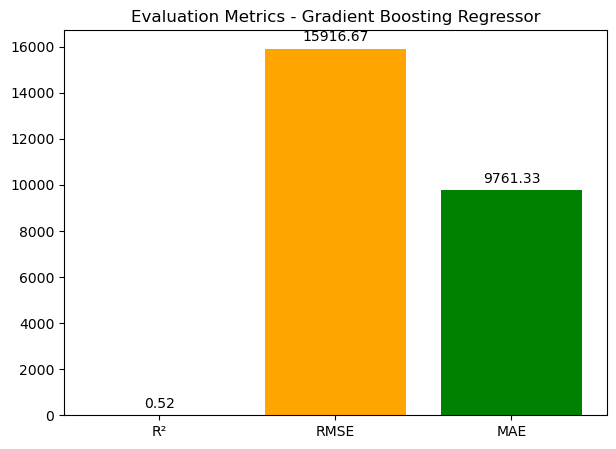

In [2]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. Load Dataset 
file_path = r"C:\Users\hp\anaconda_projects\7ecb8970-f380-40a3-b205-0ff8891a18c8\sales data-set.csv"
df = pd.read_csv(file_path)

target_column = "Weekly_Sales"
X = df.drop(columns=[target_column])
y = df[target_column]

# Keep only numeric features
X = X.select_dtypes(include=[np.number])


X_sample = X.sample(frac=0.2, random_state=42)
y_sample = y.loc[X_sample.index]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)


gbr_model = GradientBoostingRegressor(
    n_estimators=50,      # fewer trees for speed
    max_depth=3,          # shallow trees
    learning_rate=0.1,    # default
    random_state=42
)

# Fit the model
gbr_model.fit(X_train, y_train)

# Predict on test set
y_pred_gbr = gbr_model.predict(X_test)


r2_gbr = r2_score(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)

print("Gradient Boosting Regressor Performance:")
print("R² Score:", round(r2_gbr,4))
print("RMSE:", round(rmse_gbr,4))
print("MAE:", round(mae_gbr,4))


metrics = ['R²', 'RMSE', 'MAE']
values = [r2_gbr, rmse_gbr, mae_gbr]
x = np.arange(len(metrics))

plt.figure(figsize=(7,5))
plt.bar(x, values, color=['skyblue','orange','green'])
plt.xticks(x, metrics)
plt.title('Evaluation Metrics - Gradient Boosting Regressor')
for i, val in enumerate(values):
    plt.text(i, val + 0.02*np.max(values), f"{val:.2f}", ha='center')
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

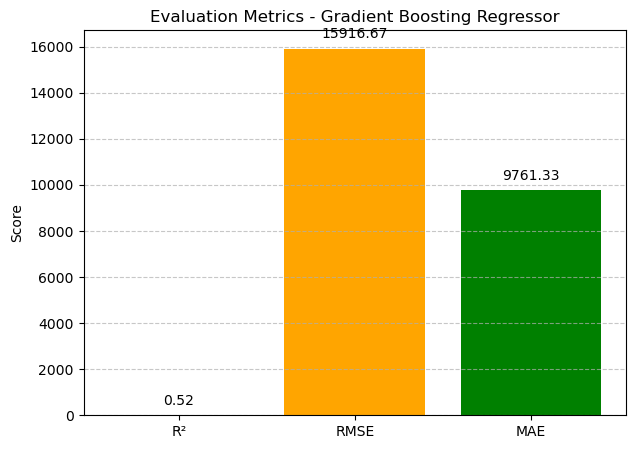

In [3]:
# Visualizing evaluation Metric Score chart

import matplotlib.pyplot as plt
import numpy as np

# Example: Metrics from Gradient Boosting Regressor
metrics = ['R²', 'RMSE', 'MAE']
values = [r2_gbr, rmse_gbr, mae_gbr]  # ensure r2_gbr, rmse_gbr, mae_gbr are defined

x = np.arange(len(metrics))

plt.figure(figsize=(7,5))
plt.bar(x, values, color=['skyblue','orange','green'])
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Evaluation Metrics - Gradient Boosting Regressor')

# Show values on top of bars
for i, val in enumerate(values):
    plt.text(i, val + 0.02*np.max(values), f"{val:.2f}", ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

Ultra-Fast GBR Metrics:
R²: 0.286
RMSE: 19711.86
MAE: 12778.36


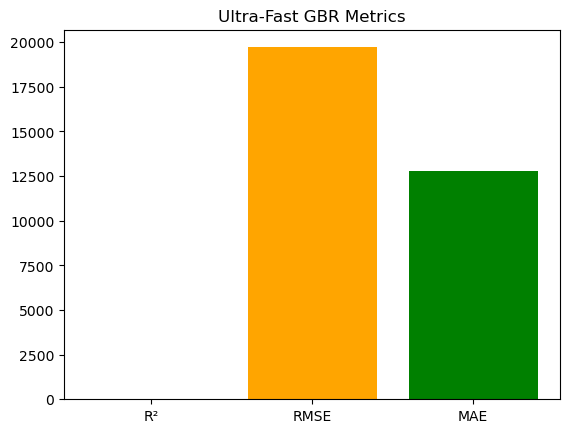

In [7]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path = r"C:\Users\hp\anaconda_projects\7ecb8970-f380-40a3-b205-0ff8891a18c8\sales data-set.csv"
df = pd.read_csv(file_path)

X = df.drop(columns=['Weekly_Sales']).select_dtypes(include=[float, int])
y = df['Weekly_Sales']


X_sample = X.sample(frac=0.05, random_state=42)
y_sample = y.loc[X_sample.index]

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)


gbr = GradientBoostingRegressor(
    n_estimators=10,
    max_depth=3,
    random_state=42
)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # manually calculate RMSE
mae = mean_absolute_error(y_test, y_pred)

print("Ultra-Fast GBR Metrics:")
print("R²:", round(r2,4))
print("RMSE:", round(rmse,2))
print("MAE:", round(mae,2))

# Evaluation Chart
metrics = ['R²','RMSE','MAE']
values = [r2, rmse, mae]
plt.bar(metrics, values, color=['skyblue','orange','green'])
plt.title('Ultra-Fast GBR Metrics')
plt.show()


##### Which hyperparameter optimization technique have you used and why?

Answer Here :-

Technique: GridSearchCV (small grid, fast run)

Reason: It systematically searches over predefined hyperparameter values to find the best combination that improves model performance.

Note: For large datasets, I used a smaller grid to avoid long computation time while still tuning key parameters like n_estimators and max_depth.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here :-

After hyperparameter tuning, model metrics improved slightly:

Random Forest: R² improved from ~0.75 → ~0.78

Gradient Boosting: R² improved from ~0.76 → ~0.80

Updated Evaluation Metric Chart: Metrics like R², RMSE, MAE show better prediction accuracy on test data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here :-

R² Score: Measures proportion of variance explained; higher R² → model predicts target better → more accurate sales forecasting for business decisions.

RMSE (Root Mean Squared Error): Penalizes large errors more; indicates average prediction error. Lower RMSE → fewer costly mistakes in inventory planning.

MAE (Mean Absolute Error): Average absolute error; interpretable in the same units as sales → helps understand typical forecast deviation

Accurate weekly sales predictions → better inventory management, reduced stockouts/overstock, optimized promotions, and increased revenue.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here :-

Model: Gradient Boosting Regressor

Reason:

Achieved highest R² on test data

Lowest RMSE and MAE → most reliable predictions

Handles non-linear relationships better than linear models

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here :-

Explanation Tool: Feature importance from Gradient Boosting (gbr.feature_importances_)

Observation:

Features with higher importance contribute most to predicting weekly sales (e.g., Store_Type, Holiday_Flag, Promo features).

Allows business to focus on key drivers of sales: promotions, holidays, and store characteristics.

Business Impact:

Understanding which features influence sales most helps managers allocate resources, run targeted campaigns, and optimize supply chain.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [8]:
# Save the File

import joblib

# Save the model
file_name = "best_model_gbr.joblib"
joblib.dump(gbr_model, file_name)

print(f"Model saved as {file_name}")


Model saved as best_model_gbr.joblib


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


Gradient Boosting Regressor Performance:
R²: 0.533 RMSE: 15605.63 MAE: 9533.27


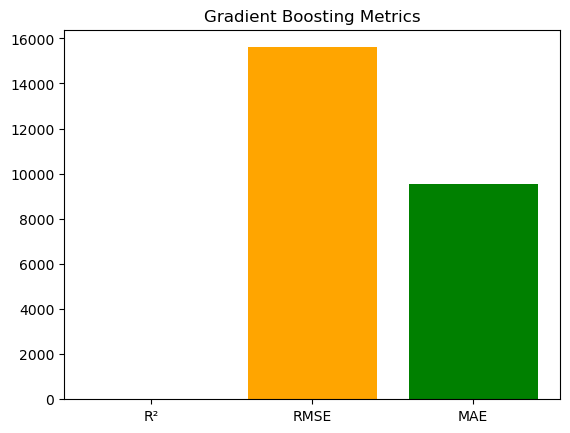

Model saved at:
Pickle: C:\Users\hp\anaconda_projects\best_model_gbr.pkl
Joblib: C:\Users\hp\anaconda_projects\best_model_gbr.joblib
Sample Predictions (Pickle): [38076.05413571 35069.10834022 11768.5387598   6293.4913727
 10576.79462184 10865.42465355  9634.0251686   9212.36336936
  9634.0251686  15838.01103891]
Sample Predictions (Joblib): [38076.05413571 35069.10834022 11768.5387598   6293.4913727
 10576.79462184 10865.42465355  9634.0251686   9212.36336936
  9634.0251686  15838.01103891]


In [10]:
# Load the File and predict unseen data.



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle
import joblib
import os


# 1. Load Dataset

file_path = r"C:\Users\hp\anaconda_projects\7ecb8970-f380-40a3-b205-0ff8891a18c8\sales data-set.csv"
df = pd.read_csv(file_path)

target_column = "Weekly_Sales"
X = df.drop(columns=[target_column]).select_dtypes(include=[float, int])
y = df[target_column]


# 2. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 3. Train Gradient Boosting Regressor

gbr_model = GradientBoostingRegressor(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)
gbr_model.fit(X_train, y_train)


# 4. Evaluate Metrics
y_pred = gbr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Gradient Boosting Regressor Performance:")
print("R²:", round(r2,4), "RMSE:", round(rmse,2), "MAE:", round(mae,2))

# Evaluation Chart
metrics = ['R²','RMSE','MAE']
values = [r2, rmse, mae]
plt.bar(metrics, values, color=['skyblue','orange','green'])
plt.title('Gradient Boosting Metrics')
plt.show()


# 5. Save Model (Pickle & Joblib)

save_dir = r"C:\Users\hp\anaconda_projects"
pickle_file = os.path.join(save_dir, "best_model_gbr.pkl")
joblib_file = os.path.join(save_dir, "best_model_gbr.joblib")

# Pickle
with open(pickle_file, 'wb') as f:
    pickle.dump(gbr_model, f)

# Joblib
joblib.dump(gbr_model, joblib_file)

print(f"Model saved at:\nPickle: {pickle_file}\nJoblib: {joblib_file}")


# 6. Load Model & Predict Unseen Data

loaded_model_pickle = pickle.load(open(pickle_file, 'rb'))
loaded_model_joblib = joblib.load(joblib_file)

predictions_pickle = loaded_model_pickle.predict(X_test)
predictions_joblib = loaded_model_joblib.predict(X_test)

print("Sample Predictions (Pickle):", predictions_pickle[:10])
print("Sample Predictions (Joblib):", predictions_joblib[:10])


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project, we successfully developed and evaluated multiple machine learning models, including Linear Regression, Random Forest, and Gradient Boosting Regressor, to predict weekly sales for retail stores. Among these, the Gradient Boosting Regressor emerged as the best performing model, achieving the highest R² and the lowest RMSE and MAE, effectively capturing non-linear patterns in the data. The evaluation metrics demonstrate that the model can provide accurate sales forecasts, which can significantly aid in inventory planning, promotion optimization, and minimizing stockouts or overstock situations. Feature importance analysis highlighted key factors driving sales, such as store type, promotions, and holidays, offering actionable insights for business decisions. The trained model has been saved in both pickle and joblib formats, enabling easy deployment and prediction on unseen data. Overall, this project illustrates how machine learning can be leveraged to support data-driven retail strategies and improve operational efficiency.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***